# Analysis on Human Resources in a Company
Purpose of this project is to make a model to determine performances of employees, estimating employees on the verge of leaving the company, studying management performance and finding the most suitable recruitment source for this perticular company provided the data.

## Data Preprocessing

### Loading the data and studying the values

In [303]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
import pandas as pd
Data = pd.read_csv("/content/drive/MyDrive/GoalEarn/Second-Task/HRDataset_v14.csv")
df = pd.DataFrame(Data)
copy= pd.DataFrame(Data)

In [305]:
df.head()

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026.00,4,0.00,62506.00,0,19.00,Production Technician I,MA,1960,...,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1.00
1,"Ait Sidi, Karthikeyan",10084.00,3,0.00,104437.00,1,27.00,Sr. DBA,MA,2148,...,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17.00
2,"Akinkuolie, Sarah",10196.00,3,0.00,64955.00,1,20.00,Production Technician II,MA,1810,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3.00
3,"Alagbe,Trina",10088.00,3,0.00,64991.00,0,19.00,Production Technician I,MA,1886,...,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15.00
4,"Anderson, Carol",10069.00,3,0.00,50825.00,1,19.00,Production Technician I,MA,2169,...,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2.00


In [306]:
#Rows with identical values in every columns will meddle with our analysis.
df.drop_duplicates(inplace = True)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 338
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               317 non-null    object 
 1   EmpID                       314 non-null    float64
 2   PerfScoreID                 317 non-null    int64  
 3   FromDiversityJobFairID      315 non-null    float64
 4   Salary                      315 non-null    float64
 5   Termd                       317 non-null    int64  
 6   PositionID                  315 non-null    float64
 7   Position                    313 non-null    object 
 8   State                       314 non-null    object 
 9   Zip                         317 non-null    int64  
 10  DOB                         314 non-null    object 
 11  Sex                         312 non-null    object 
 12  MaritalDesc                 314 non-null    object 
 13  CitizenDesc                 316 non

### Clearing out the duplicate rows of data

In [308]:
df[df.Employee_Name.duplicated(keep=False)==True].sort_values('Employee_Name')

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
5,"Anderson, Linda",10002.00,4,0.00,57568.00,0,19.00,Production Technician I,MA,1844,...,Amy Dunn,11.00,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,NaN
58,"Anderson, Linda",10002.00,4,0.00,57568.00,0,19.00,Production Technician I,MA,1844,...,Amy Dunn,11.00,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15.00
6,"Andreola, Colby",10194.00,3,0.00,95660.00,0,24.00,,MA,2110,...,Alex Sweetwater,10.00,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19.00
59,"Andreola, Colby",10194.00,3,0.00,95660.00,0,24.00,Software Engineer,MA,2110,...,Alex Sweetwater,10.00,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19.00
7,"Athwal, Sam",10062.00,3,0.00,59365.00,0,19.00,Production Technician I,MA,2199,...,NaN,19.00,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19.00
60,"Athwal, Sam",10062.00,3,0.00,59365.00,0,19.00,Production Technician I,MA,2199,...,Ketsia Liebig,19.00,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19.00
9,"Bacong, Alejandro",10250.00,3,0.00,50178.00,0,14.00,IT Support,MA,1886,...,Peter Monroe,7.00,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16.00
141,"Bacong, Alejandro",10250.00,3,0.00,50178.00,0,14.00,IT Support,MA,1886,...,Peter Monroe,7.00,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16.00
11,"Barbara, Thomas",10242.00,3,1.00,47211.00,1,19.00,Production Technician I,MA,2062,...,Kissy Sullivan,20.00,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15.00
143,"Barbara, Thomas",10242.00,3,1.00,47211.00,1,19.00,Production Technician I,MA,2062,...,Kissy Sullivan,20.00,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15.00


In [309]:
#Removing the duplicated rows related to same person which has null values in one row and a value in the other:
import numpy as np


df['count_vals']= df.count(axis='columns')
df.sort_values('count_vals', axis = 0, inplace= True, ascending= False)

for col in df.columns:  
  df[col] = df.groupby(['Employee_Name'], sort=False)[col].apply(lambda x: x.ffill().bfill())

df.sort_values('count_vals', axis = 0, inplace= True, ascending= False)
df.drop_duplicates(['Employee_Name'], inplace = True)

df[df.duplicated(subset=['Employee_Name'], keep=False)].sort_values('Employee_Name')


,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,count_vals


In [310]:
df.drop('count_vals', axis=1, inplace= True)

Filling empty EmpID cells with new random ID look alike numbers:

In [311]:
import numpy as np

index = df['EmpID'].index[df['EmpID'].apply(np.isnan)]
df_index = df.index.values.tolist()
nul_index= [df_index.index(i) for i in index]
rand_num= {}

for nul in nul_index:
  rand_num[nul]= np.random.randint(low= np.max(df['EmpID'])+1, high= np.max(df['EmpID'])+len(df['EmpID'])/10)

for index, value in rand_num.items():
  df['EmpID'].iloc[index]= value

df['EmpID'].isnull().sum()


0

Creating a summary of data frame in order to have a perspective for next steps.

In [312]:
summary = {}

for col in df.columns:
    summary[col] = {"Null val": df[col].isnull().sum(),
                    "Unique val": df[col].nunique(),
                    "Duplicate Val": df[col].duplicated().sum(),
                    "DType": type(df[col][1])}

for key in summary.items():
  print(key,':', summary.items, "\n")

('Employee_Name', {'Null val': 0, 'Unique val': 299, 'Duplicate Val': 0, 'DType': <class 'str'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('EmpID', {'Null val': 0, 'Unique val': 299, 'Duplicate Val': 0, 'DType': <class 'numpy.float64'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('PerfScoreID', {'Null val': 0, 'Unique val': 4, 'Duplicate Val': 295, 'DType': <class 'numpy.int64'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('FromDiversityJobFairID', {'Null val': 0, 'Unique val': 2, 'Duplicate Val': 297, 'DType': <class 'numpy.float64'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('Salary', {'Null val': 0, 'Unique val': 296, 'Duplicate Val': 3, 'DType': <class 'numpy.float64'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('Termd', {'Null val': 0, 'Unique val': 2, 'Duplicate Val': 297, 'DType': <class 'numpy.int64'>}) : <built-in method items of dict object at 0x7f35d0df8d40> 

('PositionID', {

We create some dataframes for future porpuses:

In [313]:
# A data frame for the employees names and IDs:
df_names= df[['EmpID', 'Employee_Name']]

In [314]:
# A data frame for the managers names and IDs:
df_managers= df[['ManagerID', 'ManagerName']]
df_managers['ManagerID'] = df_managers.groupby(['ManagerName'], sort=False)['ManagerID'].apply(lambda x: x.ffill().bfill())
df_managers['ManagerName'] = df_managers.groupby(['ManagerID'], sort=False)['ManagerName'].apply(lambda x: x.ffill().bfill())

df_managers.drop_duplicates(inplace= True)
df_managers[df_managers.duplicated(subset=['ManagerName'], keep=False)]


,ManagerID,ManagerName
90,22.00,Michael Albert
138,30.00,Michael Albert
145,1.00,Brandon R. LeBlanc
26,3.00,Brandon R. LeBlanc


In [315]:
#Dropping duplicates
df_managers.drop(index= 138, inplace= True)
df_managers.drop(index= 26, inplace= True)

In [316]:
df_managers[df_managers.duplicated(subset=['ManagerName'], keep=False)]

,ManagerID,ManagerName


Filling ManagerID Null values:

In [317]:
df=df.merge(df_managers, on='ManagerName', how='left')
df['ManagerID']=df['ManagerID_y']
df.drop(['ManagerID_y', 'ManagerID_x'],axis=1, inplace=True)
df.drop_duplicates(inplace= True)

In [318]:
# A data frame for the positions and IDs:
df_positions= df[['PositionID', 'Position']]
df_positions['Position'] = df_positions.groupby(['PositionID'], sort=False)['Position'].apply(lambda x: x.ffill().bfill())
df_positions['PositionID'] = df_positions.groupby(['Position'], sort=False)['PositionID'].apply(lambda x: x.ffill().bfill())

df_positions.drop_duplicates(inplace= True)
df_positions[df_positions.duplicated(subset=['PositionID'], keep=False)]

,PositionID,Position
12,9.00,Data Analyst
14,24.00,Software Engineer
51,13.00,IT Manager - DB
59,23.00,Software Engineer
86,9.00,Data Analyst
120,13.00,IT Manager - Support
136,24.00,
171,23.00,Shared Services Manager
196,13.00,IT Manager - Infra


In [319]:
df_positions.drop(index= 12, inplace= True)
df_positions.drop(index= 59, inplace= True)
df_positions.drop(index= 136, inplace= True)
df_positions[df_positions.duplicated(subset=['PositionID'], keep=False)]

,PositionID,Position
51,13.00,IT Manager - DB
120,13.00,IT Manager - Support
196,13.00,IT Manager - Infra


In [320]:
pstn_null_index = df[df['Position'].isnull()].index.tolist()
df[df['Position'].isnull()]

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,...,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID
291,"McKinzie, Jac",10202.00,3,0.00,63291.00,0,3.00,NaN,TX,78789,...,Lynn Daneault,Website,Fully Meets,3.40,4,0,1/29/2019,0,7.00,21.00
292,"Delarge, Alex",10306.00,1,0.00,61568.00,0,3.00,NaN,AL,36006,...,John Smith,Indeed,PIP,1.93,3,0,1/30/2019,6,5.00,17.00


In [321]:
#Filling the empty position cells, seeking help from the data frame created before:
df['Position'].iloc[291]= 'Area Sales Manager'
df['Position'].iloc[292]= 'Area Sales Manager'
df[df['Position'].isnull()]

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,...,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID


In [322]:
df=df.merge(df_positions, on='Position', how='left')
df['PositionID']=df['PositionID_y']
df.drop(['PositionID_y', 'PositionID_x'],axis=1, inplace=True)
df.drop_duplicates(['Employee_Name'], inplace = True)

In [323]:
df[df['PositionID'].isnull()]

,Employee_Name,EmpID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID,PositionID
12,"Pearson, Randall",10259.00,3,0.00,93093.00,1,Data Analyst,MA,2747,9/5/1984,...,Employee Referral,Fully Meets,4.70,4,5,1/16/2016,0,19.00,4.00,NaN
135,"Barbossa, Hector",10012.00,4,1.00,92328.00,0,Data Analyst,TX,78230,7/4/1988,...,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9.00,4.00,NaN
144,"Andreola, Colby",10194.00,3,0.00,95660.00,0,,MA,2110,5/24/1979,...,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19.00,10.00,NaN
204,"Zhou, Julia",10043.00,3,0.00,89292.00,0,Data Analyst,MA,2148,2/24/1979,...,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11.00,4.00,NaN
218,"Simard, Kramer",10178.00,3,0.00,87826.00,0,Data Analyst,MA,2110,2/8/1970,...,Employee Referral,Fully Meets,3.32,3,7,1/14/2019,0,16.00,4.00,NaN
246,"Roby, Lori",10162.00,3,0.00,89883.00,0,Data Analyst,MA,1886,10/11/1981,...,Employee Referral,Fully Meets,3.69,5,6,2/14/2019,0,15.00,4.00,NaN
258,"Costello, Frank",10193.00,3,0.00,83552.00,0,Data Analyst,MA,1810,8/26/1986,...,Indeed,Fully Meets,3.04,3,6,1/22/2019,0,2.00,4.00,NaN
282,"Petrowsky, Thelma",10016.00,4,0.00,93554.00,0,Data Analyst,MA,1886,9/16/1984,...,Employee Referral,Exceeds,4.60,5,7,1/4/2019,0,16.00,4.00,NaN


In [324]:
copy['Position'].iloc[df[df['PositionID'].isnull()].index]

12                Data Analyst
135    Production Technician I
144               Data Analyst
204    Production Technician I
218    Production Technician I
246    Production Technician I
258                        NaN
282    Production Technician I
Name: Position, dtype: object

In [325]:
positions= {12: 9.0, 135: 19.0, 144: 9.0, 204: 19.0, 218: 9.0, 246: 19.0, 282: 19.0, 258: 9.0}

df['PositionID'].fillna(positions, inplace= True)

In [326]:
df_positions

,PositionID,Position
0,19.00,Production Technician I
4,20.00,Production Technician II
7,15.00,Network Engineer
13,3.00,Area Sales Manager
14,24.00,Software Engineer
20,2.00,Administrative Assistant
22,18.00,Production Manager
25,8.00,Database Administrator
34,30.00,Enterprise Architect
51,13.00,IT Manager - DB


Irrelevant datas should be removed. such as Termd (we have other columns holding this data within), ZIP, ...
Columns which hold names of employees or managers should be removed also, we kept them in seperate data frame for future refrences.
Dates will transform to time intervals so become easier to deal with.

In [327]:
#Since we are going to drop the "Termd" column, we check it with the "DateofTermination" column.
df.pivot_table(values='DateofTermination', index = 'Termd',
               margins = True, margins_name='Total',
               aggfunc= 'count')

,DateofTermination
Termd,
0,0
1,99
Total,99


In [328]:
Irrel_cols = ['Termd','Zip','FromDiversityJobFairID','Position','Employee_Name','HispanicLatino','ManagerName']
df.drop(Irrel_cols, axis = 1, inplace= True)

Filling DOB column null values

In [329]:
df['DOB'].isnull().sum()/df['DOB'].count()

0.006734006734006734

In [330]:
df['DOB'].fillna(df['DOB'].mode()[0], inplace= True)

In [331]:
birth_dates= df['DOB']

The DOB column need data cleaning since the values hold different formats

In [332]:
from datetime import datetime

birth_dates= []
for row in df['DOB']:
  if "/" not in row:
    birth_dates.append(pd.to_datetime(row, format='%d%m%y'))
  else:
    birth_dates.append(pd.to_datetime(row))

df['DOB']= birth_dates
df["age"] = df['DOB'].apply(lambda x : (pd.datetime.now().year - x.year))


In [333]:
df.drop('DOB', axis=1, inplace= True)

In [334]:
df['DateofHire'].isnull().sum()/df['DateofHire'].count()

0.010135135135135136

In [335]:
df[df['DateofHire'].isnull()==True].index.tolist()

[292, 301, 304]

DateofHire column is similare to DOB column in formatting.

In [336]:
df.sort_values(by= 'EmpID', inplace= True)
df['DateofHire']= df['DateofHire'].ffill()

hire_dates= []
for row in df['DateofHire']:
  if "/" not in row:
    hire_dates.append(hire_dates[-1])
  else:
    hire_dates.append(pd.to_datetime(row))

df['DateofHire']= hire_dates


In [337]:
df['DateofTermination'] = df['DateofTermination'].fillna(pd.to_datetime(pd.datetime.now()))

term_dates= []
for row in df['DateofTermination']:
  if isinstance(row, datetime):
    term_dates.append(row)
  elif "/" not in row:
    term_dates.append(pd.to_datetime(row, format='%d%m%y'))
  else:
    term_dates.append(pd.to_datetime(row))

df['DateofTermination']= term_dates

In [338]:
df['emplmnt_intrvl'] = df['DateofTermination'] - pd.to_datetime(df['DateofHire'])
df['emplmnt_intrvl']=(df['emplmnt_intrvl']/np.timedelta64(1,'Y'))//1

In [339]:
df.drop(['DateofTermination', 'DateofHire'], axis= 1, inplace= True)

In [340]:
# LastPerformanceReview_Date

review_dates= []
for row in df['LastPerformanceReview_Date']:
  if isinstance(row, float):
    review_dates.append("%%")
  elif "/" not in row:
    review_dates.append(pd.to_datetime(row[:-1], format='%d%m%y'))
  else:
    review_dates.append(pd.to_datetime(row))

df['LastPerformanceReview_Date']= review_dates
df['LastPerformanceReview_Date']= df['LastPerformanceReview_Date'].replace('%%',)


Curios to study the column named 'TermReason' to see is they are useful

In [341]:
df['TermReason'].value_counts()

N/A-StillEmployed                   199
Another position                     19
unhappy                              14
more money                           10
career change                         9
hours                                 8
relocation out of area                5
attendance                            5
performance                           4
no-call, no-show                      4
military                              4
return to school                      4
retiring                              4
medical issues                        3
maternity leave - did not return      3
gross misconduct                      1
Learned that he is a gangster         1
Fatal attraction                      1
Name: TermReason, dtype: int64

In [342]:
df_leavers=df[['EmploymentStatus', 'TermReason']]
df_leavers.drop_duplicates(inplace=True)
df_leavers.sort_values(by= 'EmploymentStatus', inplace=True)
df_leavers

,EmploymentStatus,TermReason
109,Active,N/A-StillEmployed
290,Active,NaN
26,Terminated for Cause,performance
35,Terminated for Cause,Learned that he is a gangster
20,Terminated for Cause,"no-call, no-show"
33,Terminated for Cause,attendance
75,Terminated for Cause,Fatal attraction
43,Terminated for Cause,gross misconduct
7,Voluntarily Terminated,medical issues
90,Voluntarily Terminated,more money


It is not holding useful datas so it gets dropped:

In [343]:
df.drop(['TermReason'], axis = 1, inplace = True)

### Before Labeling Datas, we check for outliars

Lets check the age:

In [344]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
outliers = df[(df['age'] < Q1 - whisker_width*IQR) | (df['age'] > Q3 + whisker_width*IQR)]
outliers

,EmpID,PerfScoreID,Salary,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,Department,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID,PositionID,age,emplmnt_intrvl
114,10067.00,3,61656.00,MA,F,Single,US Citizen,White,Active,Production,...,5.00,4,0,2019-02-12 00:00:00,0,11.00,22.00,19.00,72,8.00
19,10078.00,3,71966.00,MA,F,Married,US Citizen,Asian,Voluntarily Terminated,Production,...,5.00,3,0,2013-07-02 00:00:00,0,17.00,39.00,20.00,71,1.00
16,10097.00,3,52177.00,MA,F,Single,US Citizen,White,Voluntarily Terminated,Production,...,4.64,4,0,2015-05-02 00:00:00,0,8.00,39.00,19.00,71,3.00
94,10100.00,3,58275.00,MA,F,Separated,US Citizen,Black or African American,Voluntarily Terminated,Production,...,4.62,5,0,2015-05-06 00:00:00,0,1.00,18.00,20.00,72,4.00
250,10146.00,3,72202.00,MA,NaN,Married,US Citizen,White,Voluntarily Terminated,Production,...,3.93,3,0,2017-04-18 00:00:00,0,3.00,16.00,20.00,70,6.00
234,10180.00,3,87565.00,MA,M,Married,US Citizen,Asian,Active,IT/IS,...,3.27,4,5,2047-03-04 00:00:00,0,13.00,7.00,28.00,-33,8.00
134,10212.00,3,85028.00,CT,F,Married,US Citizen,White,Active,IT/IS,...,3.10,5,8,2019-02-12 00:00:00,0,19.00,7.00,28.00,71,8.00
238,10291.00,2,72992.00,MA,M,Divorced,US Citizen,Black or African American,Active,Sales,...,2.40,4,0,2048-03-04 00:00:00,2,16.00,15.00,21.00,13,11.00


Ages above 70 are detected as outliers by the statistics.
There are 2 rows with ages 13 and -33 which are obviously wronge.
So we get rid of them.

In [345]:
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

df.drop(df['age'][df['age']<lower_whisker].index, axis = 0, inplace= True)

For the last part, we check employment interval for outliers:

In [346]:
Q1=df['emplmnt_intrvl'].quantile(0.25)
Q3=df['emplmnt_intrvl'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
outliers = df[(df['emplmnt_intrvl'] < Q1 - whisker_width*IQR) | (df['emplmnt_intrvl'] > Q3 + whisker_width*IQR)]
outliers

,EmpID,PerfScoreID,Salary,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,Department,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID,PositionID,age,emplmnt_intrvl
267,10013.00,4,64397.00,ND,M,Separated,US Citizen,White,Active,Sales,...,4.10,3,0,2019-01-04 00:00:00,0,6.00,21.00,3.00,55,17.00


There is no outlier here. Then LastPerformanceReview_Date will be checked for outliers.

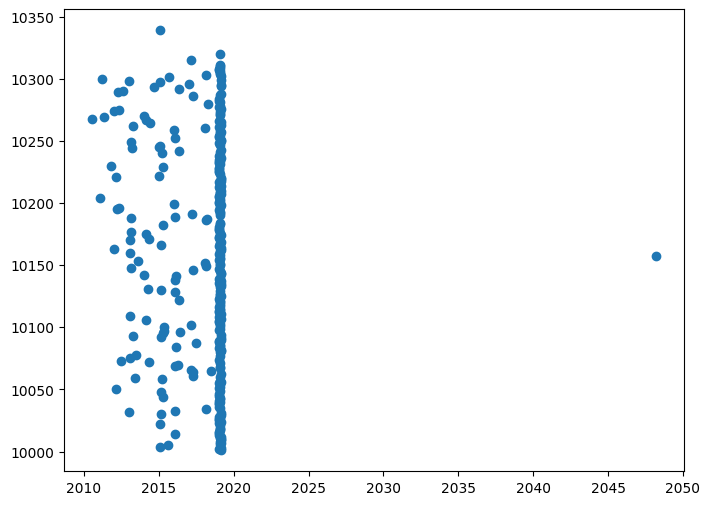

In [347]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df.LastPerformanceReview_Date, df.EmpID)

In [348]:
max_date= pd.Timestamp.today()
df.drop(df[df['LastPerformanceReview_Date']> pd.Timestamp.today()].index, axis = 0, inplace= True)

### Now we deal with the rest of null values:

In [349]:
df[df['Sex'].isnull()==True]

,EmpID,PerfScoreID,Salary,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,Department,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID,PositionID,age,emplmnt_intrvl
250,10146.00,3,72202.00,MA,NaN,Married,US Citizen,White,Voluntarily Terminated,Production,...,3.93,3,0,2017-04-18 00:00:00,0,3.00,16.00,20.00,70,6.00
236,10303.00,1,52674.00,MA,NaN,Single,US Citizen,Two or more races,Terminated for Cause,Production,...,2.33,2,0,2018-03-09 00:00:00,6,3.00,20.00,19.00,43,4.00


In [350]:
df_names[df_names['EmpID']==10146.0]

,EmpID,Employee_Name
299,10146.00,"Tejeda, Lenora"


In [351]:
df_names[df_names['EmpID']==10303.0]

,EmpID,Employee_Name
227,10303.00,"O'hare, Lynn"


They are both females based on their names.

In [352]:
df['Sex'].fillna('F', inplace= True)


In [353]:
df[df['MaritalDesc'].isnull()==True]

,EmpID,PerfScoreID,Salary,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,Department,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerID,PositionID,age,emplmnt_intrvl
300,10183.00,3,62068.00,MA,F,NaN,US Citizen,White,Active,Production,...,3.21,3,0,2019-01-29 00:00:00,0,7.00,22.00,19.00,38,7.00


Null values in some columns are not enough to make changes in our analysis, but we rather to keep the values of other columns in same row as null values. So they get filled up with values which has the least effect on the analysis.

In [354]:
df['MaritalDesc']= df['MaritalDesc'].ffill()
df['RaceDesc']= df['RaceDesc'].ffill()
df['RecruitmentSource']= df['RecruitmentSource'].ffill()
df['EngagementSurvey']= df['EngagementSurvey'].fillna(0)
df['Absences']= df['Absences'].fillna(0)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 109 to 148
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       296 non-null    float64
 1   PerfScoreID                 296 non-null    int64  
 2   Salary                      296 non-null    float64
 3   State                       296 non-null    object 
 4   Sex                         296 non-null    object 
 5   MaritalDesc                 296 non-null    object 
 6   CitizenDesc                 296 non-null    object 
 7   RaceDesc                    296 non-null    object 
 8   EmploymentStatus            296 non-null    object 
 9   Department                  296 non-null    object 
 10  RecruitmentSource           296 non-null    object 
 11  PerformanceScore            296 non-null    object 
 12  EngagementSurvey            296 non-null    float64
 13  EmpSatisfaction             296 n

Now the data is finally clean!

### Labeling and Discretizing data:

Taking a look inside the Salary columns.

In [356]:
df['Salary'].describe()

count      296.00
mean     69274.06
std      25488.69
min      45046.00
25%      55780.50
50%      62978.50
75%      72001.00
max     250000.00
Name: Salary, dtype: float64

Visualizing the Salary column values to see if we can estimate the number of clusters for the data

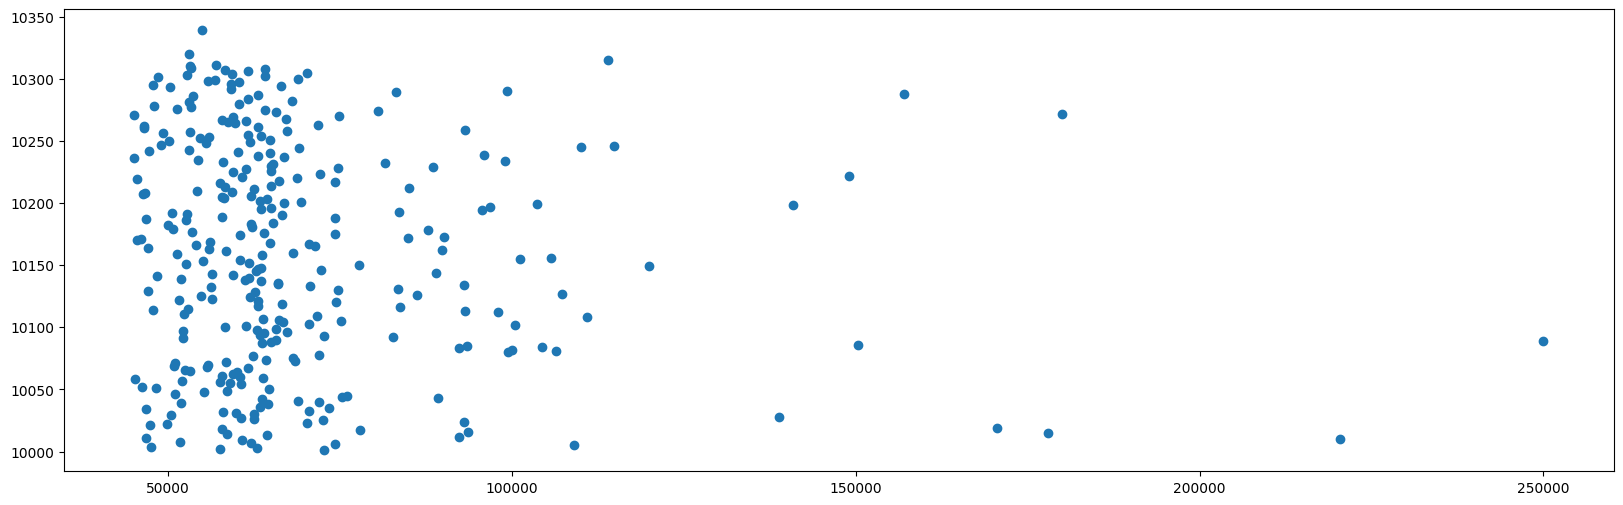

In [357]:
plt.figure(figsize=(20,6))
plt.scatter(df.Salary, df.EmpID)

In [358]:
df_salary = df[['EmpID', 'Salary', 'PositionID', 'Department', 'EmploymentStatus']]

Majority of employees have salaries less than 100000, so we start our labeling from minimum value and raise it 10000 until we reach area which is less crowded!
Then we take bigger steps.

In [359]:
def grading(number):

  if number <= 55000:
    return 50000
  elif number <= 65000:
    return 60000
  elif number <= 75000:
    return 70000
  elif number <= 85000:
    return 80000
  elif number <= 105000:
    return 95000
  elif number <= 155000:
    return 125000
  elif number <= 205000:
    return 180000
  else:
    return 210000

df['Salary_Grade'] = df['Salary'].apply(grading)


In [360]:
#Replacing grades in salary column.
df_salary['Grade']=df['Salary_Grade']

Labaling the EmploymentStatus column.

In [361]:
emp_stat = pd.DataFrame(df['EmploymentStatus'].value_counts())
emp_stat

,EmploymentStatus
Active,197
Voluntarily Terminated,84
Terminated for Cause,15


In [362]:
def status(text):
  if text == "Active":
    return 1
  elif text == "Voluntarily Terminated":
    return 2
  else:
    return 3

df['EmploymentStatus'] = df['EmploymentStatus'].apply(status)
emp_status=['Active', 'Voluntarily Terminated', 'Terminated for Cause']


Labeling RecruitmentSource columns

In [363]:
rec_source= pd.DataFrame(df['RecruitmentSource'].value_counts())
rec_source

,RecruitmentSource
Indeed,81
LinkedIn,72
Google Search,48
Employee Referral,29
Diversity Job Fair,27
CareerBuilder,23
Website,13
Other,2
On-line Web application,1


In [364]:
def recruitment(text):
  if text == 'Indeed':
    return 1
  elif text == 'LinkedIn':
    return 2
  elif text == 'Google Search':
    return 3
  elif text == 'Employee Referral':
    return 4
  elif text == 'Diversity Job Fair':
    return 5
  elif text == 'CareerBuilder':
    return 6
  elif text == 'Website' or 'On-line Web application':
    return 7
  else:
    return 9


df['RecruitmentSource_Labeled'] = df['RecruitmentSource'].apply(recruitment)
recruit=['Indeed', 'LinkedIn', 'Google Search',  'Employee Referral', 'Diversity Job Fair', 'CareerBuilder', 'Other']

Labeling PerformanceScore columns

In [365]:
performance = pd.DataFrame(df['PerformanceScore'].value_counts())
performance

,PerformanceScore
Fully Meets,231
Exceeds,36
Needs Improvement,16
PIP,13


Labeling State column

In [366]:
States = pd.DataFrame(df['State'].value_counts())
States

,State
MA,261
CT,6
TX,3
VT,2
NH,1
AL,1
WA,1
RI,1
IN,1
ME,1


In [367]:
def States(text):
  if text == 'MA':
    return 1
  else:
    return 2

df['State_labeled'] = df['State'].apply(States)
emp_state=['MA', 'Other']

Labeling Sex columns

In [368]:
def Sex(text):
  if text == 'F':
    return 1
  else:
    return 2

df['Sex_labeled'] = df['Sex'].apply(Sex)
emp_sex=['F', 'M']

Labeling MaritalDesc column

In [369]:
Mar_Stat = pd.DataFrame(df['MaritalDesc'].value_counts())
Mar_Stat

,MaritalDesc
Single,131
Married,117
Divorced,29
Separated,12
Widowed,7


In [370]:
def Mar_stat(text):
  if text == 'Single':
    return 1
  elif text == 'Married':
    return 2
  elif text == 'Divorced':
    return 3
  elif text == 'Separated':
    return 4
  else:
    return 5

df['MaritalDesc_labeld'] = df['MaritalDesc'].apply(Mar_stat)
emp_marit=['Single', 'Married', 'Divorced', 'Separated', 'Widowed']



Labeling CitizanDesc column

In [371]:
Citizenship = pd.DataFrame(df['CitizenDesc'].value_counts())
Citizenship

,CitizenDesc
US Citizen,280
Eligible NonCitizen,12
Non-Citizen,4


In [372]:
def Citizenship(text):
  if text == 'US Citizen':
    return 1
  elif text == 'Eligible NonCitizen':
    return 2
  else:
    return 3

df['CitizenDesc_labeled'] = df['CitizenDesc'].apply(Citizenship)
emp_citiz=['US Citizen', 'Eligible NonCitizen', 'Non-Citizen']



Labeling RaceDesc column

In [373]:
Race = pd.DataFrame(df['RaceDesc'].value_counts())
Race

,RaceDesc
White,179
Black or African American,76
Asian,26
Two or more races,11
American Indian or Alaska Native,3
Hispanic,1


In [374]:
def Race(text):
  if text == 'White':
    return 1
  elif text == 'Black or African American':
    return 2
  elif text == 'Asian':
    return 3
  elif text == 'Two or more races':
    return 4
  elif text == 'American Indian or Alaska Native':
    return 5
  else:
    return 6


df['RaceDesc_labeled'] = df['RaceDesc'].apply(Race)
emp_race=['White', 'Black or African American', 'Two or more races', 'American Indian or Alaska Native', 'Hispanic']

In [375]:
departments = pd.DataFrame(df['Department'].value_counts())
departments

,Department
Production,198
IT/IS,48
Sales,30
Software Engineering,10
Admin Offices,9
Executive Office,1


In [376]:
def departments(text):
  if text == 'Production':
    return 1
  elif text == 'IT/IS':
    return 2
  elif text == 'Sales':
    return 3
  elif text == 'Software Engineering':
    return 4
  elif text == 'Admin Offices':
    return 5
  else:
    return 6


df['Department_Labeled'] = df['Department'].apply(Race)
dep_list=['Production', 'IT/IS', 'Sales', 'Software Engineering', 'Admin Offices', 'Executive Office']

## Extracting datas devided by department names

In [377]:
df_departments= pd.DataFrame(df['Department'])
df_departments

,Department
109,Production
138,Production
102,Production
86,Production
14,Software Engineering
...,...
202,Production
263,Production
197,IT/IS
289,Production


In [ ]:
!pip install xlsxwriter

for deps in df_departments['Department'].values.tolist():
  path = ''
  name = deps.strip().replace('/', '_')
  path = '/content/'+name
  df[df['Department'] == deps].drop(['Department'], axis = 1).to_excel(path, sheet_name= name, index=False, engine='xlsxwriter')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Features effect on performance

In [ ]:

rel_col=['EmpID', 'EmploymentStatus', 'ManagerID','Salary', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']
cor= pd.DataFrame(df.drop(rel_col, axis= 1).corr())
cor.loc['PerfScoreID']

PerfScoreID                  1.000000
EngagementSurvey             0.508628
EmpSatisfaction              0.303369
SpecialProjectsCount         0.044414
DaysLateLast30              -0.733611
Absences                     0.064007
PositionID                   0.027004
age                          0.072990
emplmnt_intrvl               0.102054
Salary_Grade                 0.135645
RecruitmentSource_Labeled   -0.019799
State_labeled               -0.022793
Sex_labeled                 -0.062813
MaritalDesc_labeld           0.035562
CitizenDesc_labeled         -0.011301
RaceDesc_labeled            -0.033801
Department_Labeled                NaN
Name: PerfScoreID, dtype: float64

<Axes: >

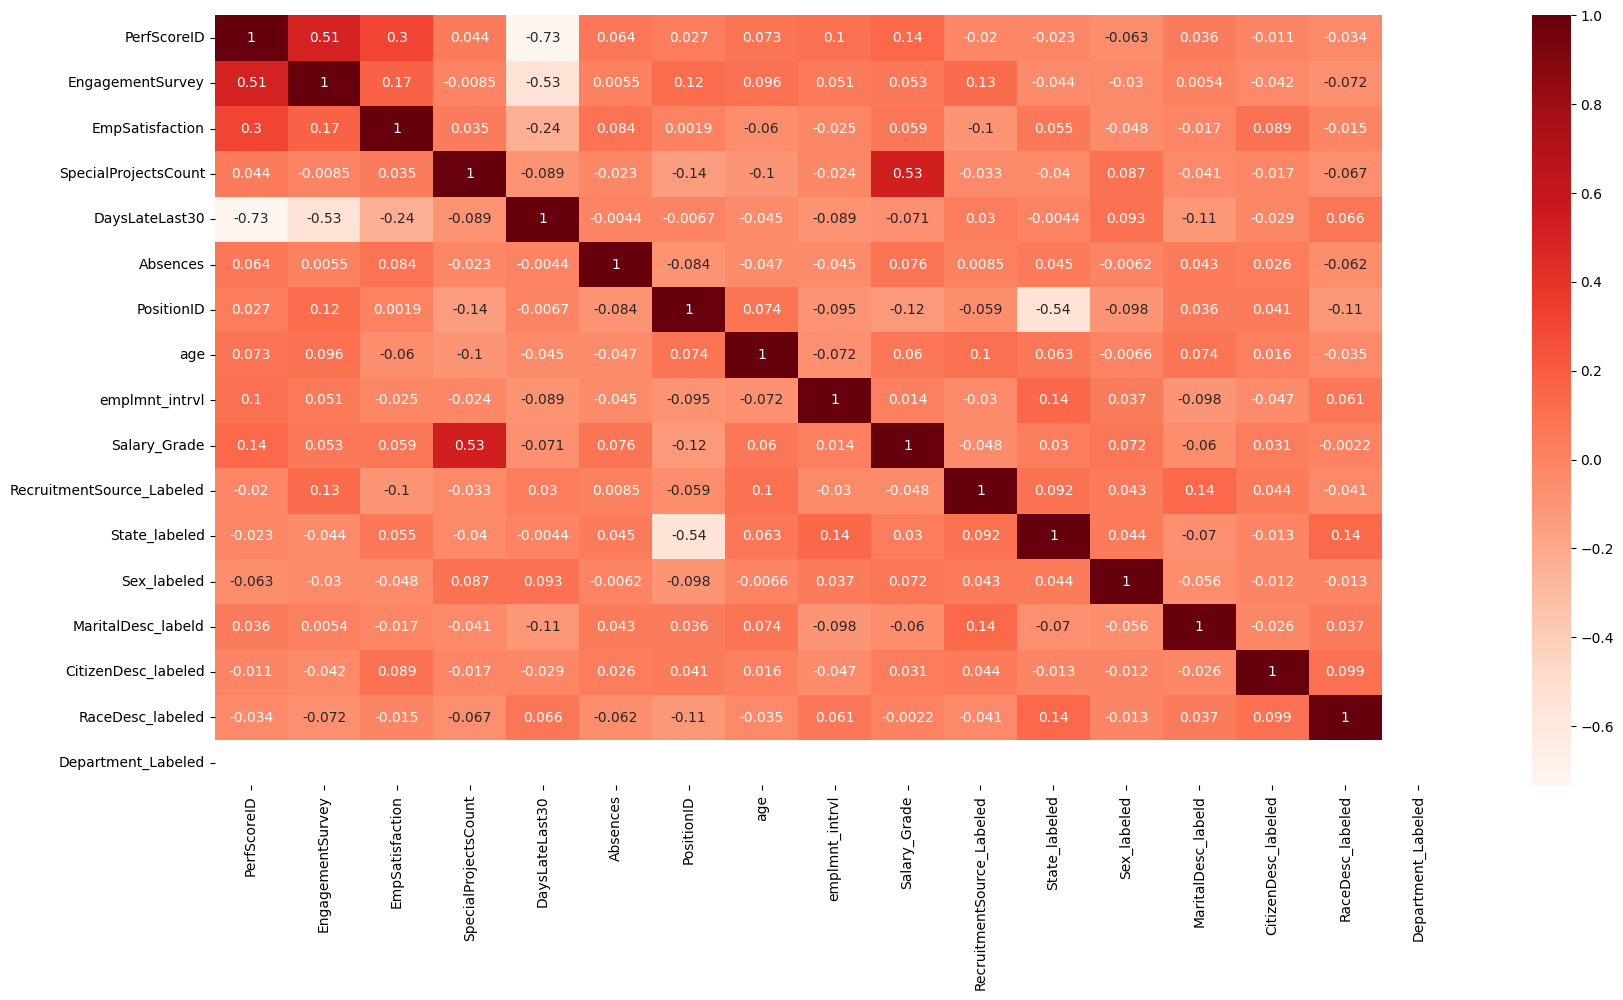

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))       

sns.heatmap(cor,annot=True,cmap='Reds', ax=ax)

<Axes: >

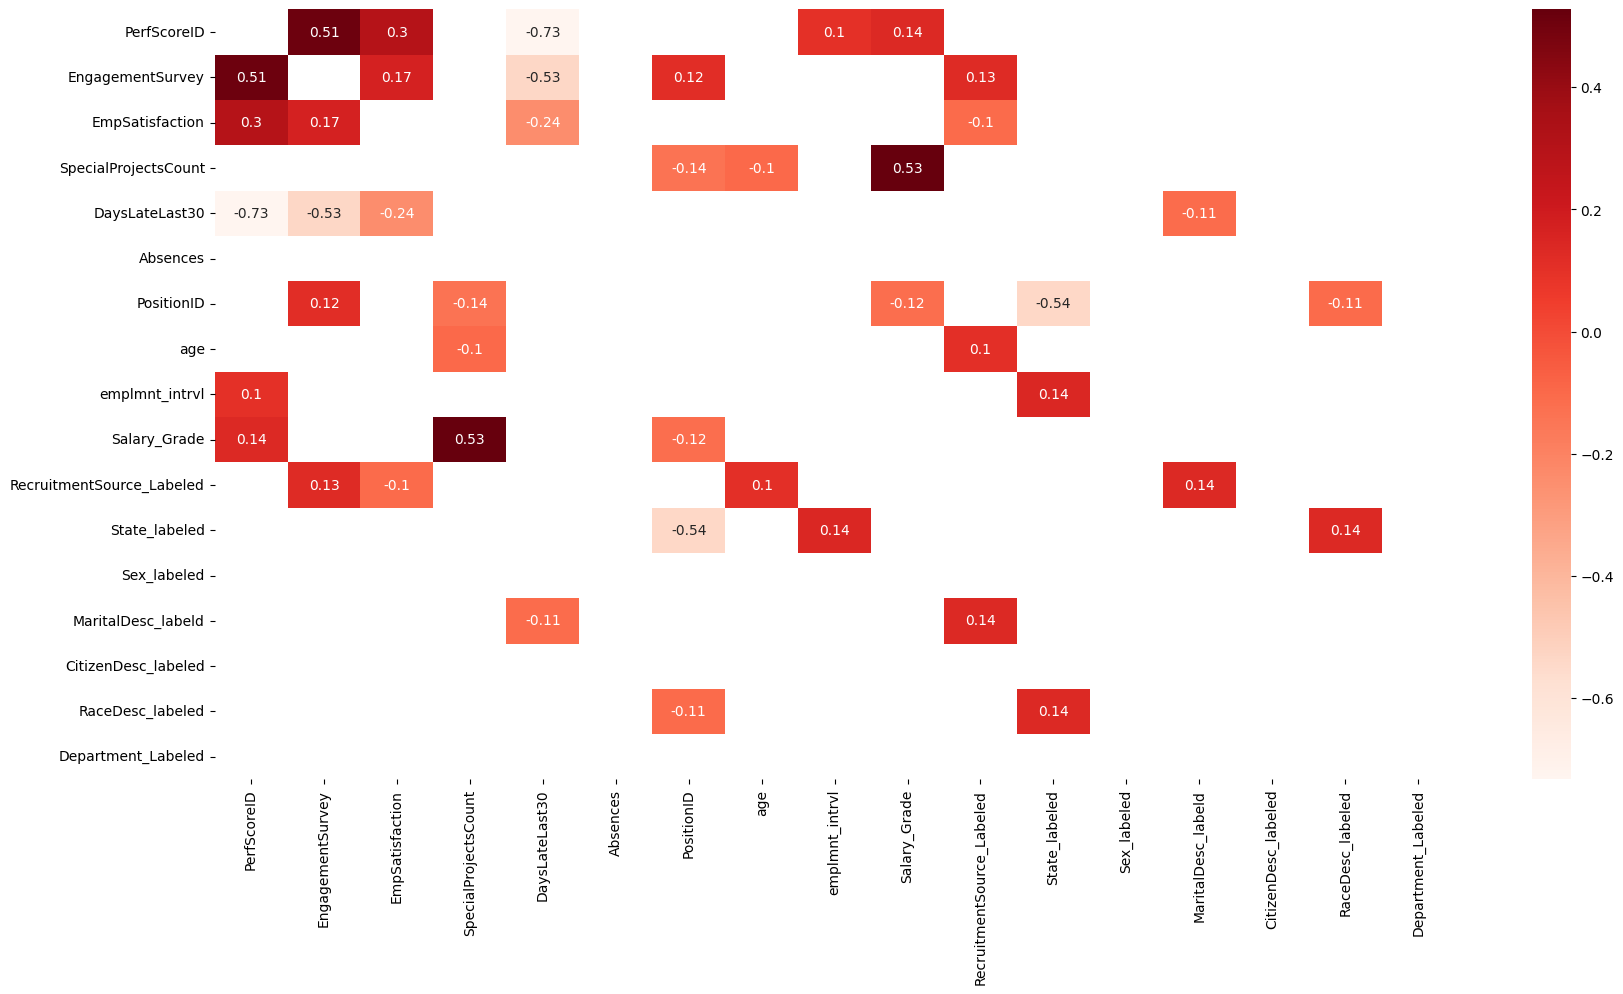

In [ ]:
filteredDf = cor[((cor >= .1) | (cor <= -.1)) & (cor !=1.000)]
fig, ax = plt.subplots(figsize=(20,10))       
sns.heatmap(filteredDf, annot=True, cmap="Reds")


"EngagementSurvey" and "EmpSatisfaction" have the most positive impact on performance score as expected. "Salary" has a positive role in performance too although the effect is low.
As for the negative aspects, "DaysLateLast30" pulled down performance scores alot.

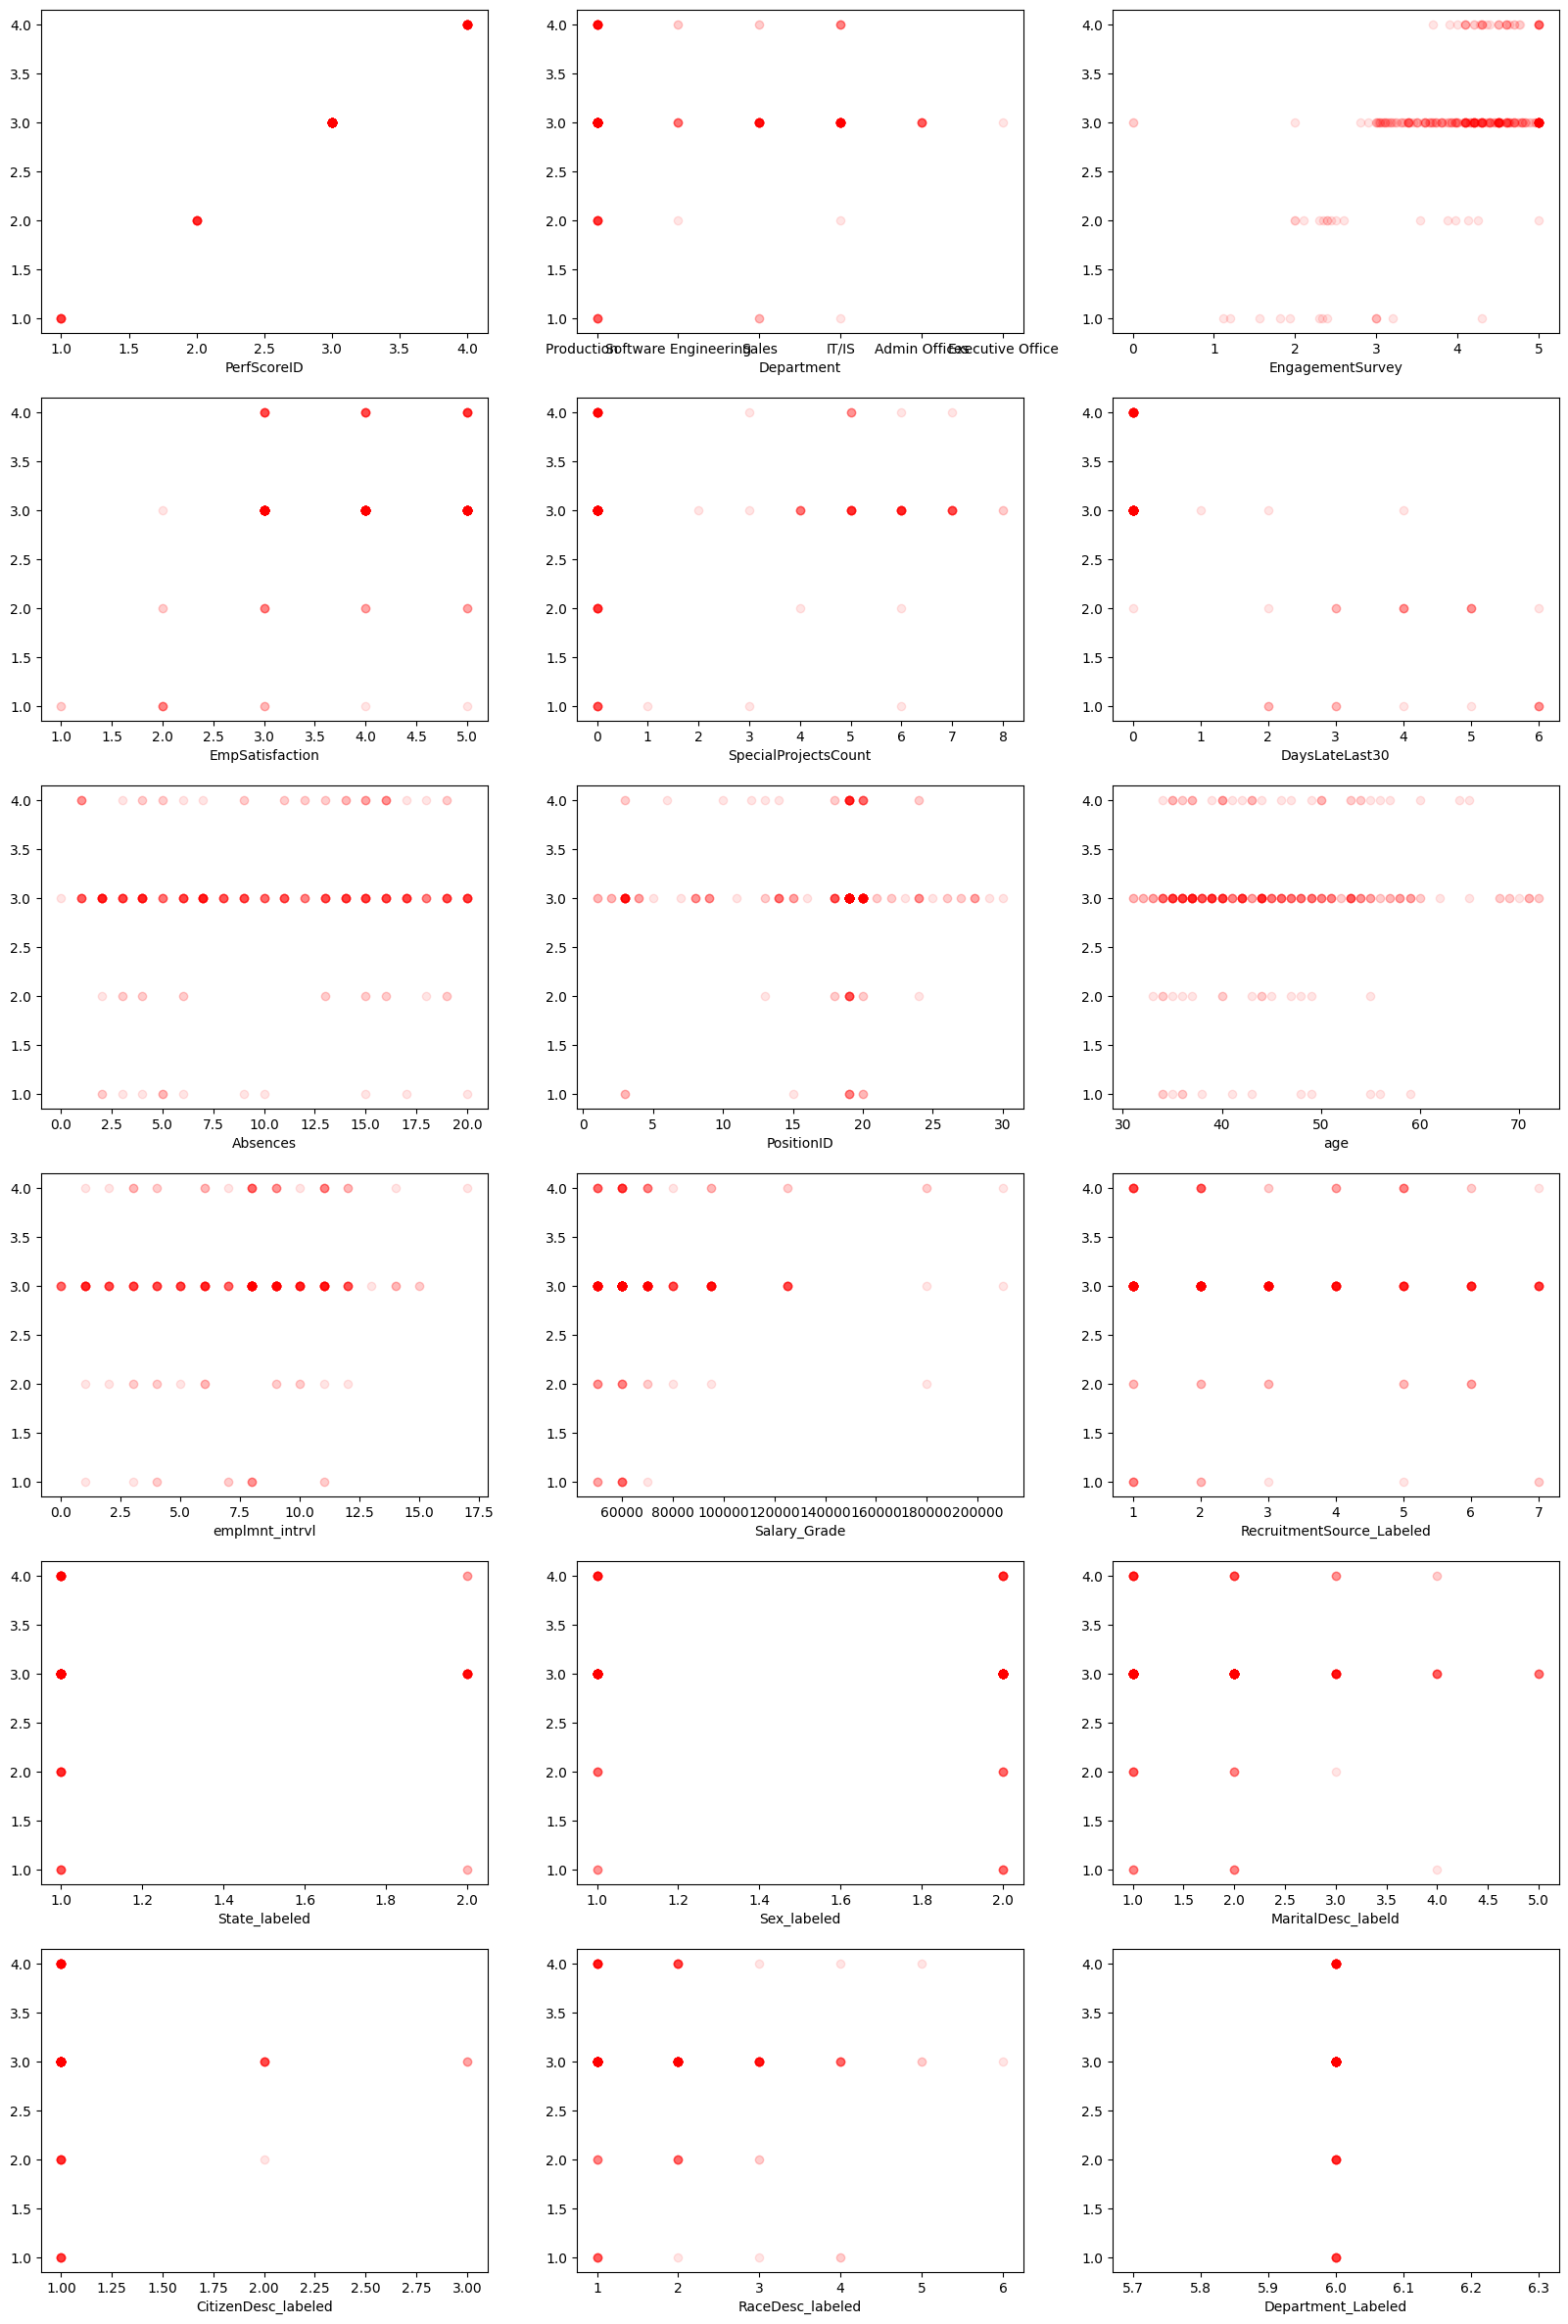

In [ ]:
plt.figure(figsize=(20,30))
i=1
for item in df.drop(rel_col, axis= 1).columns:
  plt.subplot(6,3,i)
  plt.xlabel(item)
  plt.scatter(df[item], df['PerfScoreID'], alpha=0.1, c='r')
  i+=1

<Axes: xlabel='PerfScoreID', ylabel='Department'>

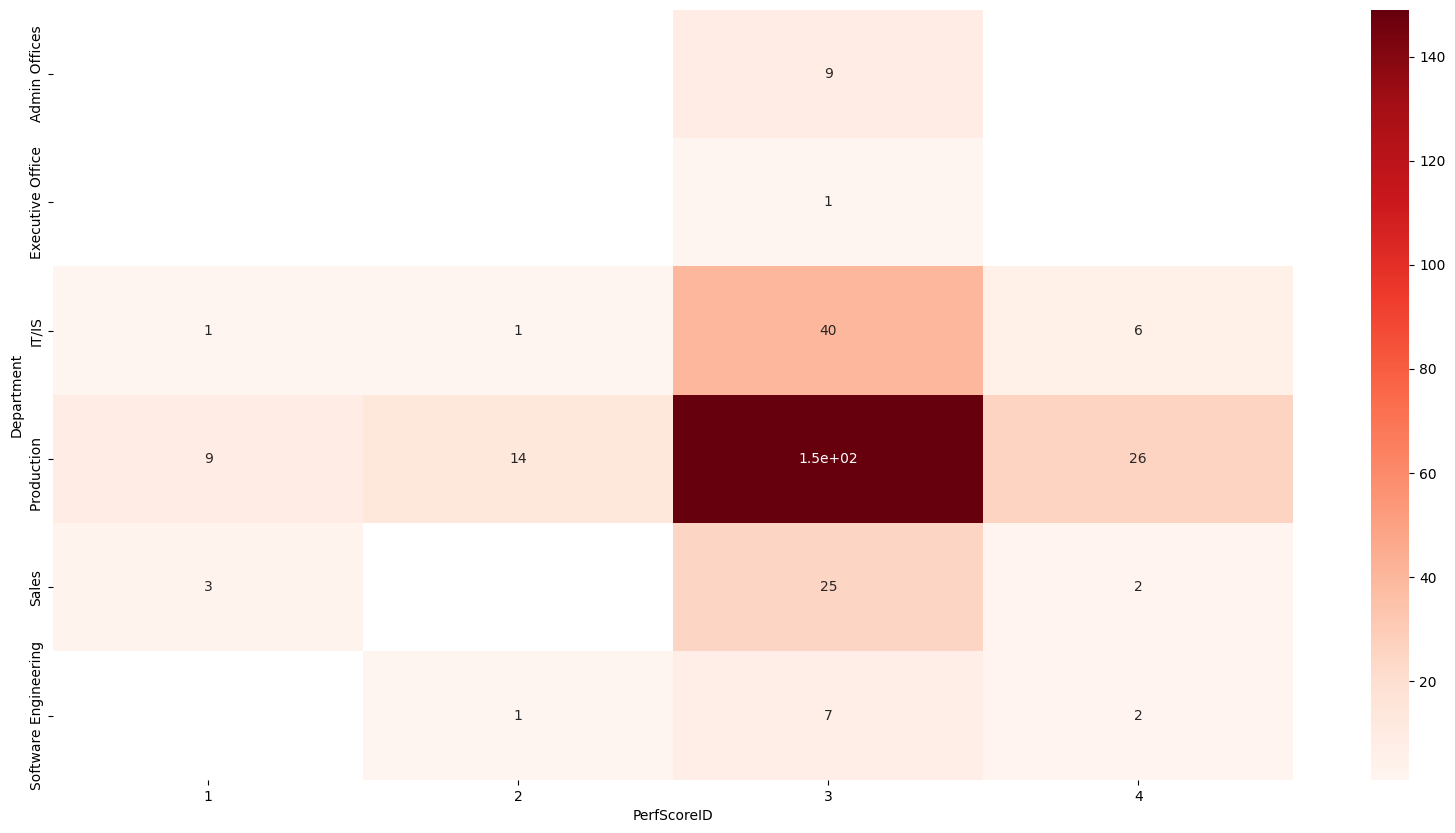

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'Department']].pivot_table(values='EmpID', index = 'Department',
                     columns= 'PerfScoreID',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='PerfScoreID', ylabel='EmpSatisfaction'>

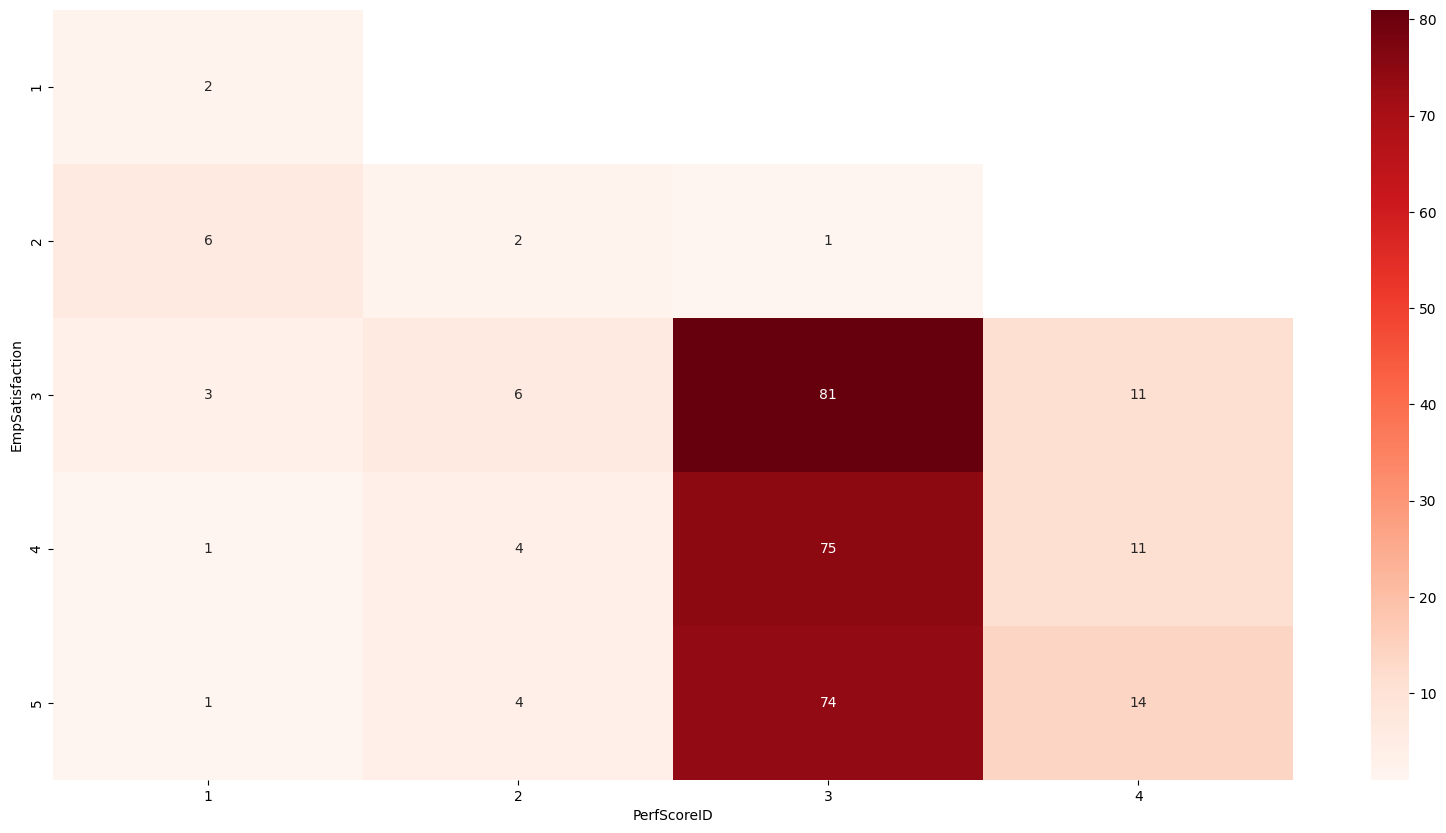

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'EmpSatisfaction']].pivot_table(values='EmpID', index = 'EmpSatisfaction',
                     columns= 'PerfScoreID',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='PositionID', ylabel='PerfScoreID'>

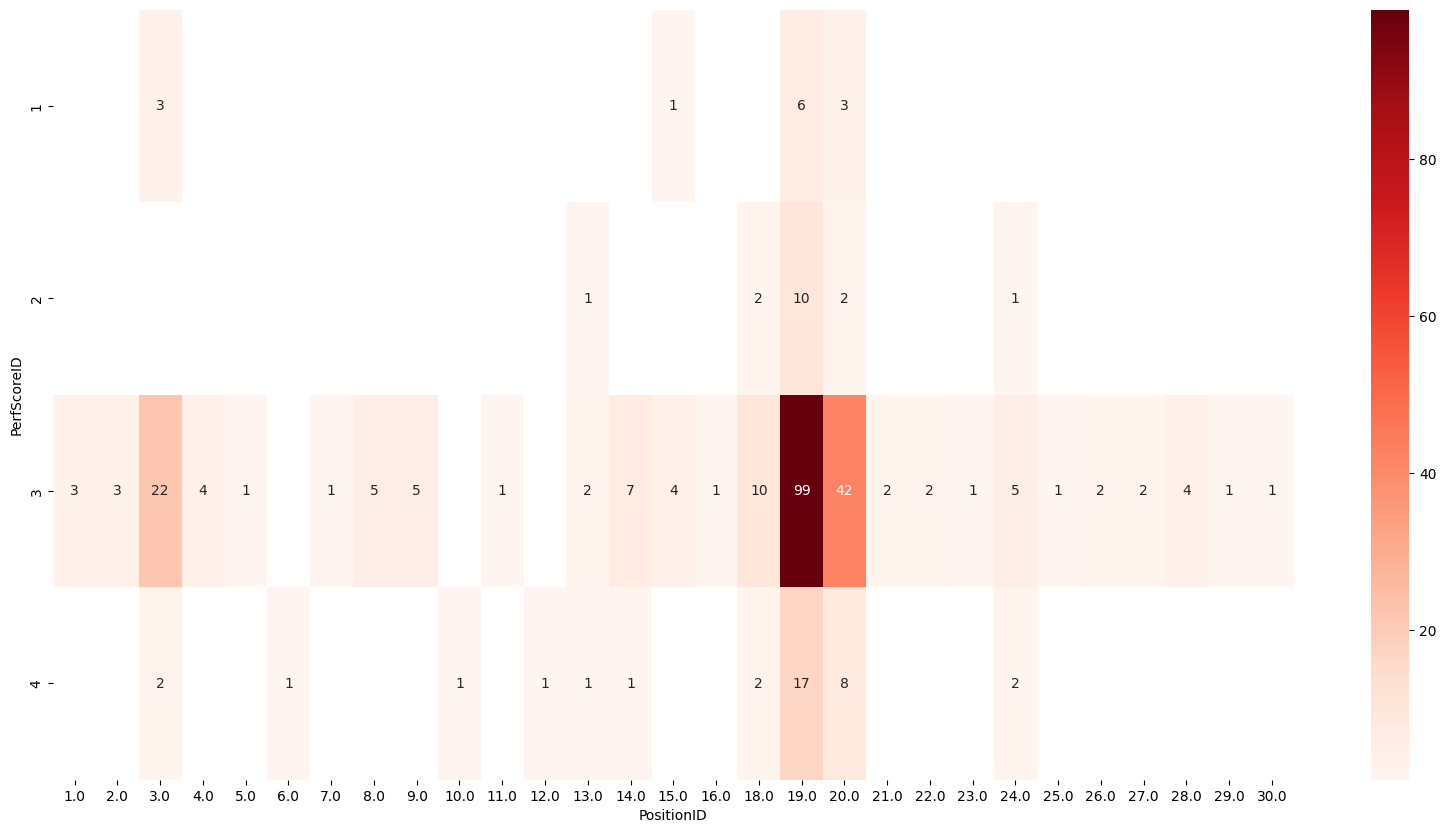

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'PositionID']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'PositionID',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='age', ylabel='PerfScoreID'>

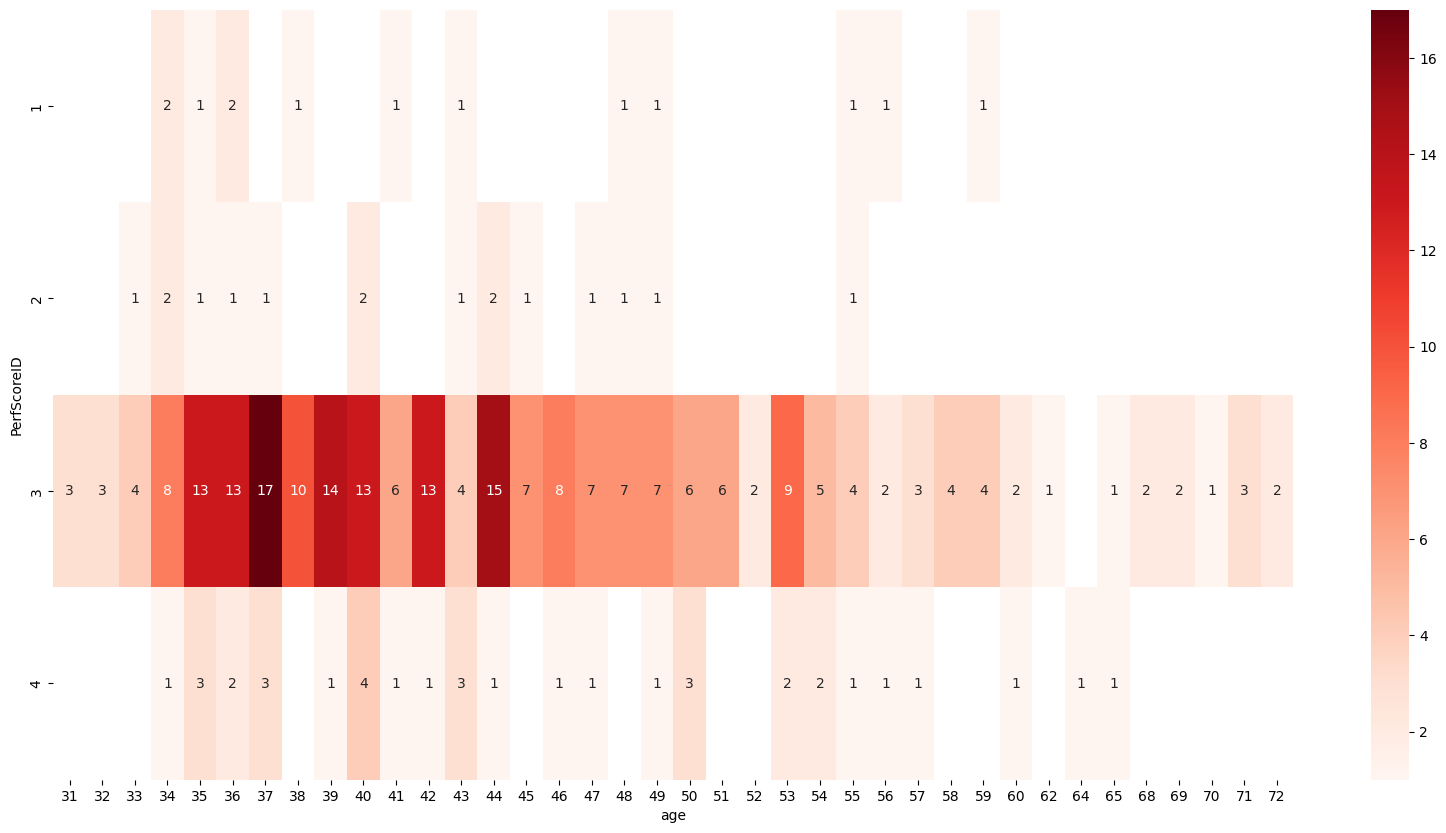

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'age']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'age',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='emplmnt_intrvl', ylabel='PerfScoreID'>

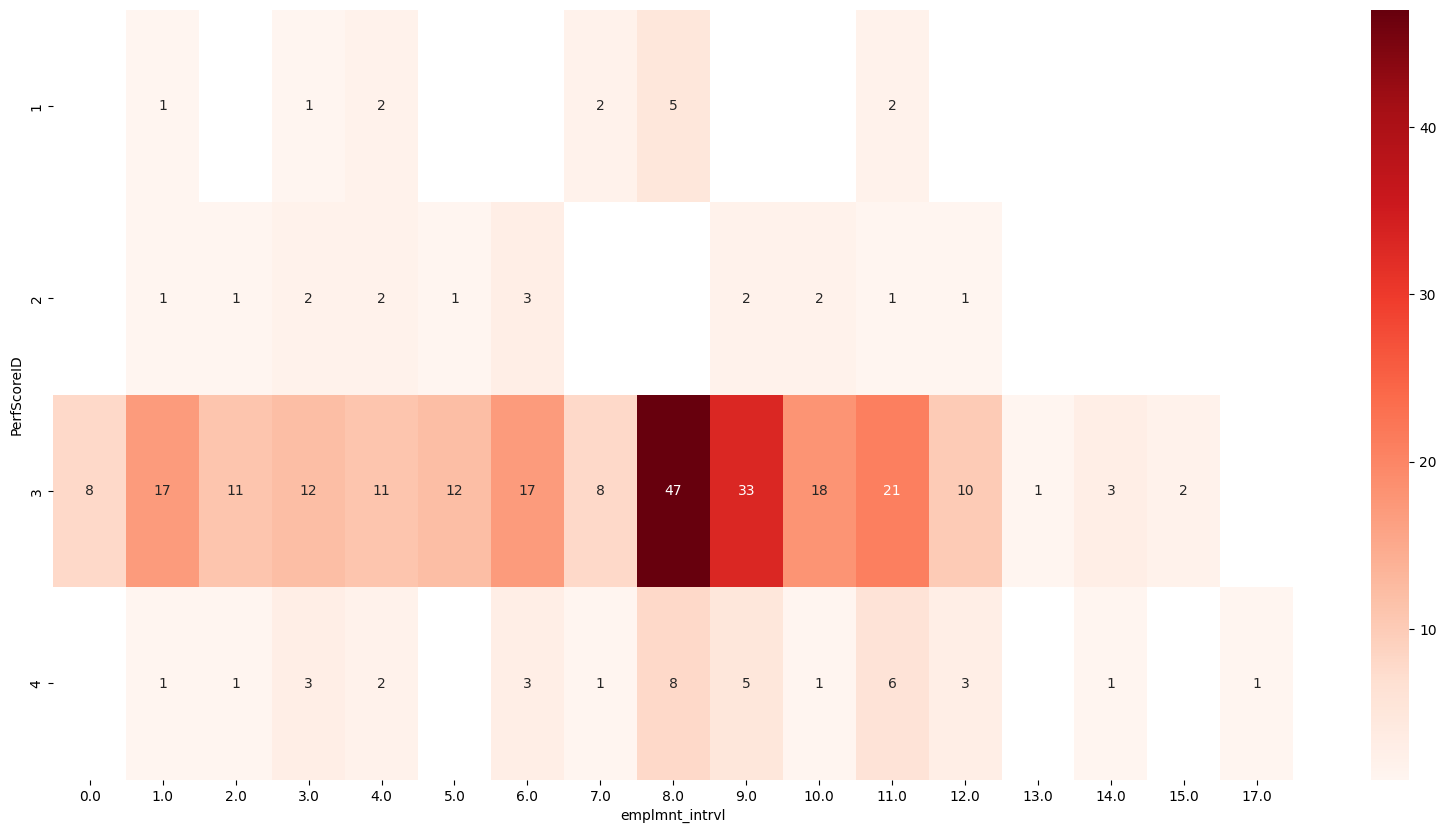

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'emplmnt_intrvl']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'emplmnt_intrvl',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='Salary_Grade', ylabel='PerfScoreID'>

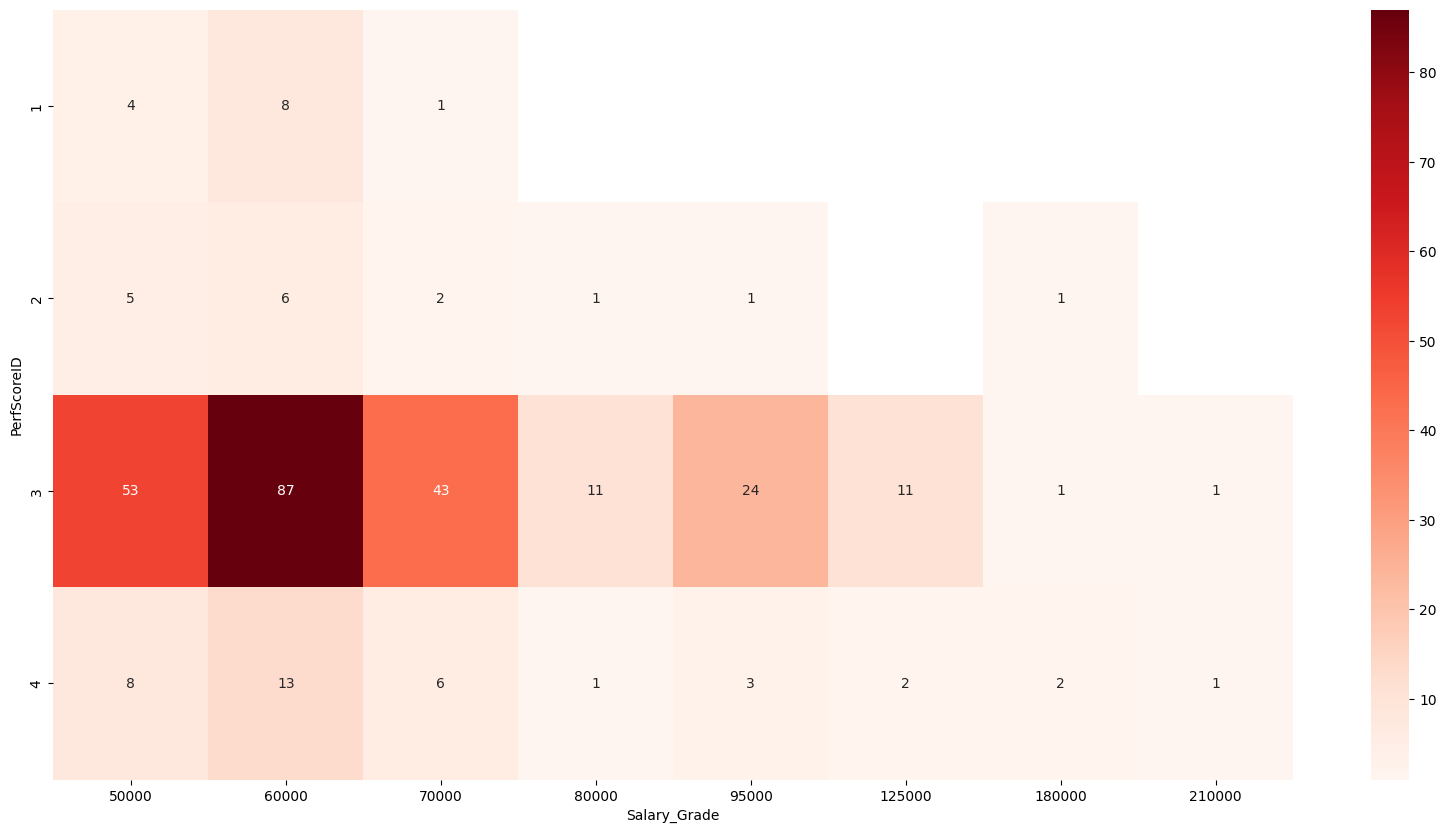

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'Salary_Grade']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'Salary_Grade',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='Sex_labeled', ylabel='PerfScoreID'>

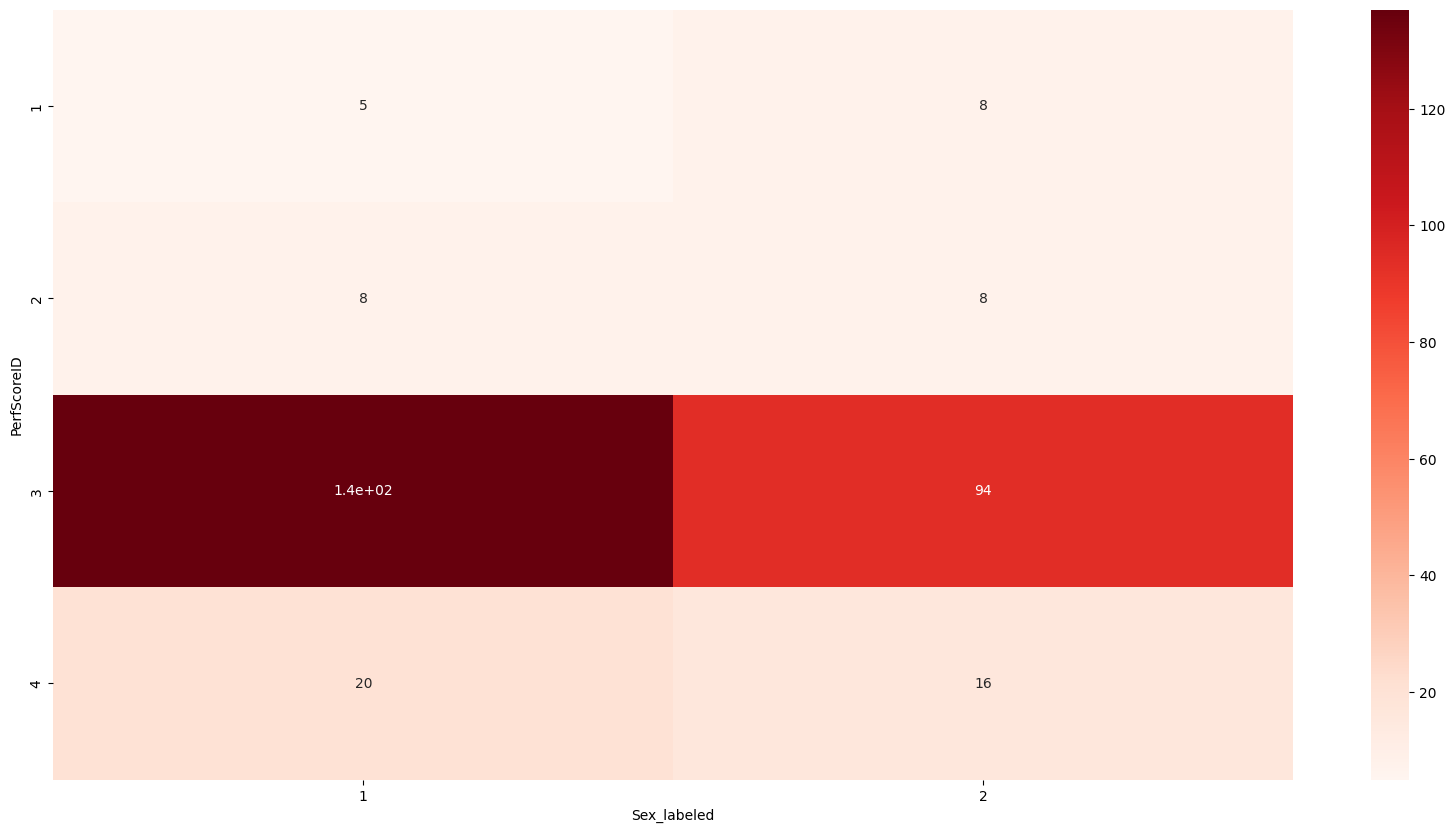

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'Sex_labeled']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'Sex_labeled',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

<Axes: xlabel='RaceDesc_labeled', ylabel='PerfScoreID'>

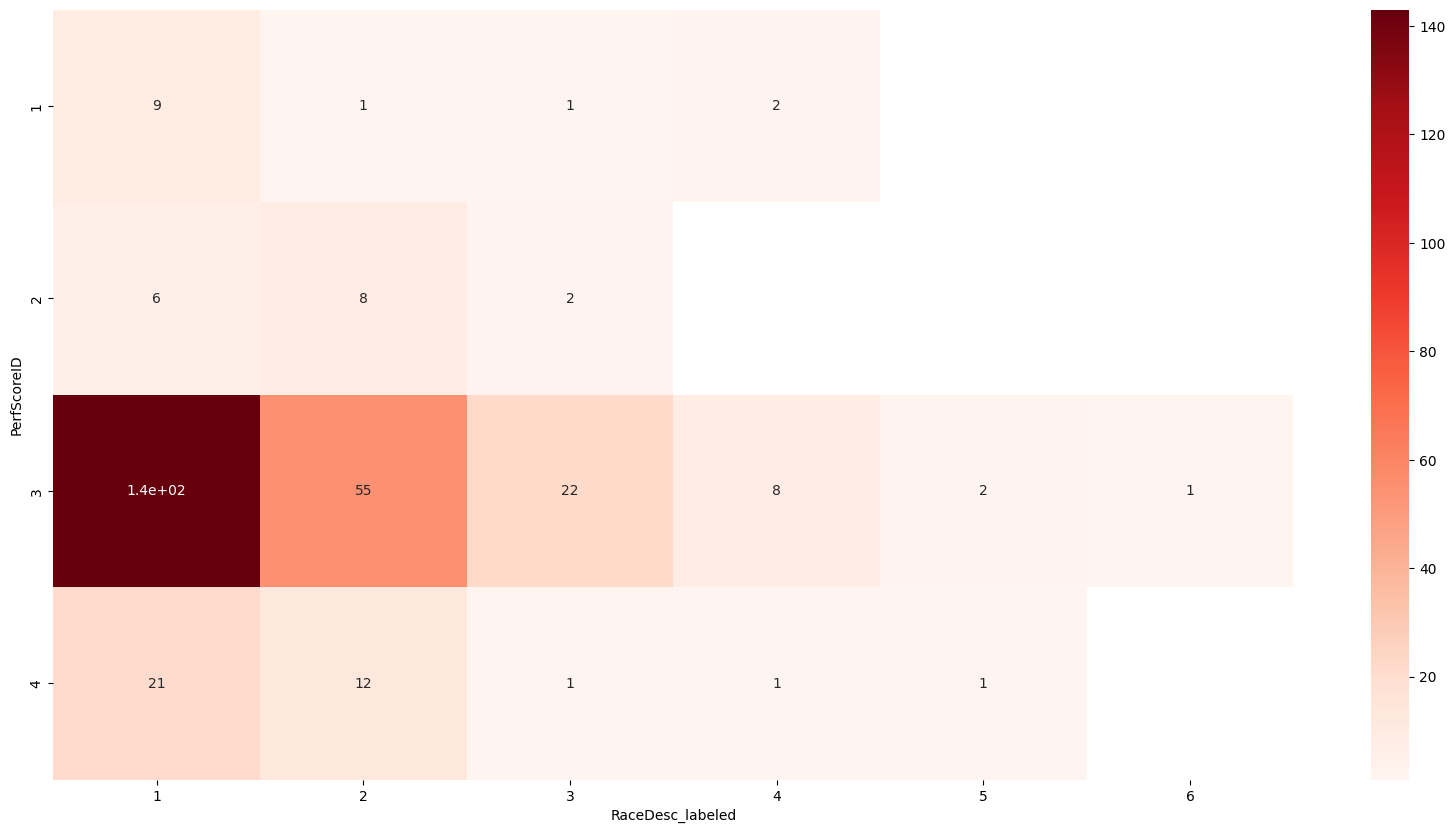

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
score_dep= df[['EmpID', 'PerfScoreID', 'RaceDesc_labeled']].pivot_table(values='EmpID', index ='PerfScoreID' ,
                     columns= 'RaceDesc_labeled',
                     aggfunc= 'count')#,
                    #  margins = True, margins_name='Total')
                    #  ).plot.bar(ax=ax)
sns.heatmap(score_dep, annot=True, cmap="Reds")

## Salary Distribution

In [ ]:
cor.loc['Salary_Grade']

PerfScoreID                  0.135645
EngagementSurvey             0.053330
EmpSatisfaction              0.058788
SpecialProjectsCount         0.527774
DaysLateLast30              -0.071189
Absences                     0.075591
PositionID                  -0.121060
age                          0.059539
emplmnt_intrvl               0.014334
Salary_Grade                 1.000000
RecruitmentSource_Labeled   -0.047686
State_labeled                0.030360
Sex_labeled                  0.071648
MaritalDesc_labeld          -0.060283
CitizenDesc_labeled          0.030898
RaceDesc_labeled            -0.002174
Department_Labeled                NaN
Name: Salary_Grade, dtype: float64

In [ ]:
df_salary.pivot_table(values='Salary', index = 'Department',
                     columns= 'Grade',
                     aggfunc= 'sum',
                     margins = True, margins_name='Total')

Grade,50000,60000,70000,80000,95000,125000,180000,210000,Total
Department,,,,,,,,,
Admin Offices,156840.0,190523.0,NaN,NaN,192397.0,106367.0,NaN,NaN,646127.0
Executive Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,250000.0
IT/IS,258670.0,61242.0,346278.0,401349.0,1693006.0,1361751.0,335000.0,220450.0,4677746.0
Production,3104934.0,5777495.0,2299119.0,483122.0,88976.0,NaN,170500.0,NaN,11924146.0
Sales,NaN,910308.0,977599.0,NaN,NaN,NaN,180000.0,NaN,2067907.0
Software Engineering,NaN,NaN,NaN,161055.0,669154.0,108987.0,NaN,NaN,939196.0
Total,3520444.0,6939568.0,3622996.0,1045526.0,2643533.0,1577105.0,685500.0,470450.0,20505122.0


<Axes: xlabel='Department', ylabel='Salary Average'>

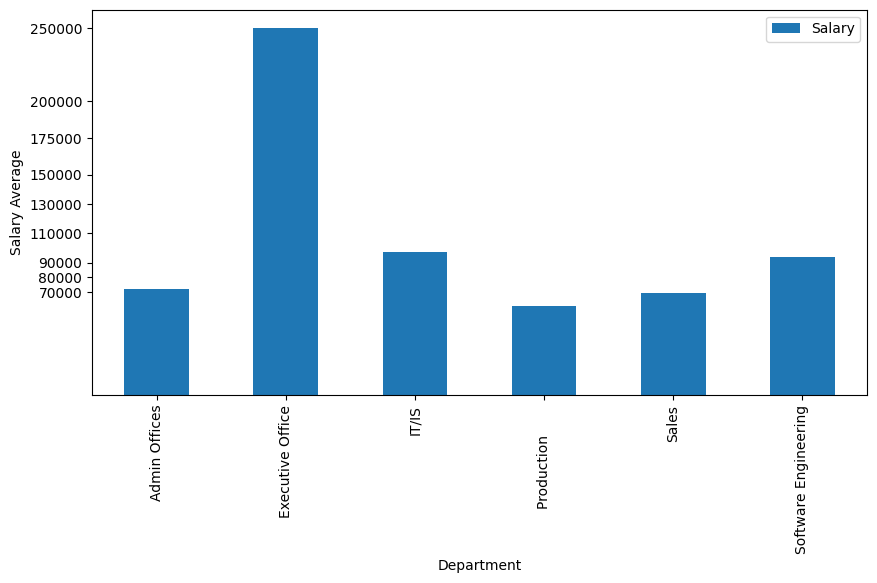

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.yticks([70000,80000,90000,110000,130000,150000,175000,200000,250000])
plt.ylabel('Salary Average')
df_salary.pivot_table(values='Salary', index = 'Department',
                     aggfunc= 'mean').plot.bar(ax=ax)

<Axes: xlabel='Department', ylabel='Salary Grades'>

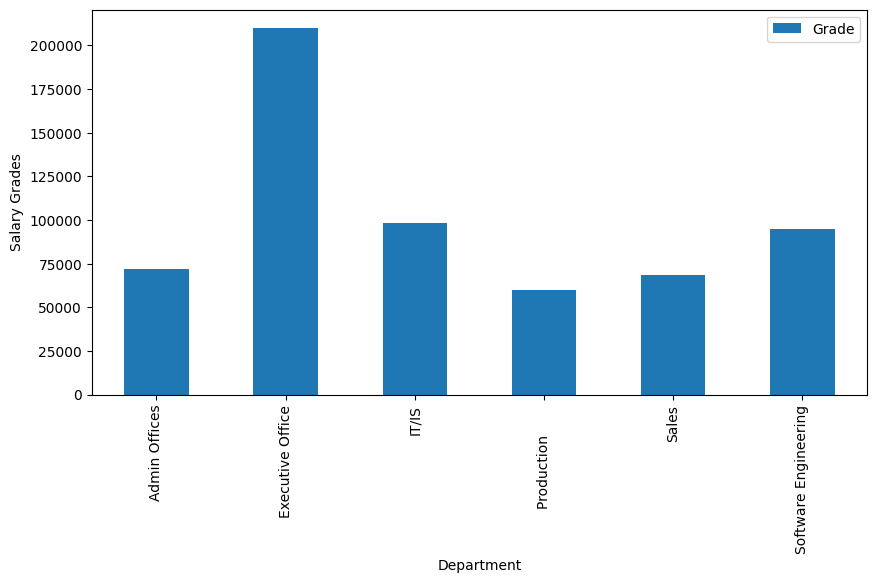

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary Grades')
df_salary.pivot_table(values='Grade', index = 'Department').plot.bar(ax=ax)

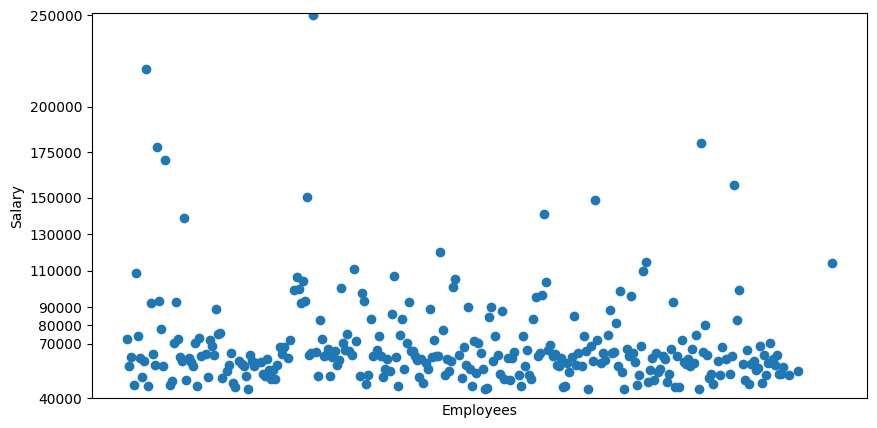

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.yticks([40000, 70000,80000,90000,110000,130000,150000,175000,200000,250000])
plt.ylabel('Salary')
plt.xlabel('Employees')
plt.xticks([])
plt.ylim(40000,251000)
plt.scatter(df_salary['EmpID'], df_salary['Salary'])

(array([59., 69., 83., 29., 10., 15., 10.,  7.,  3.,  1.,  0.,  2.,  2.,
         1.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 45046.  ,  53244.16,  61442.32,  69640.48,  77838.64,  86036.8 ,
         94234.96, 102433.12, 110631.28, 118829.44, 127027.6 , 135225.76,
        143423.92, 151622.08, 159820.24, 168018.4 , 176216.56, 184414.72,
        192612.88, 200811.04, 209009.2 , 217207.36, 225405.52, 233603.68,
        241801.84, 250000.  ]),
 <BarContainer object of 25 artists>)

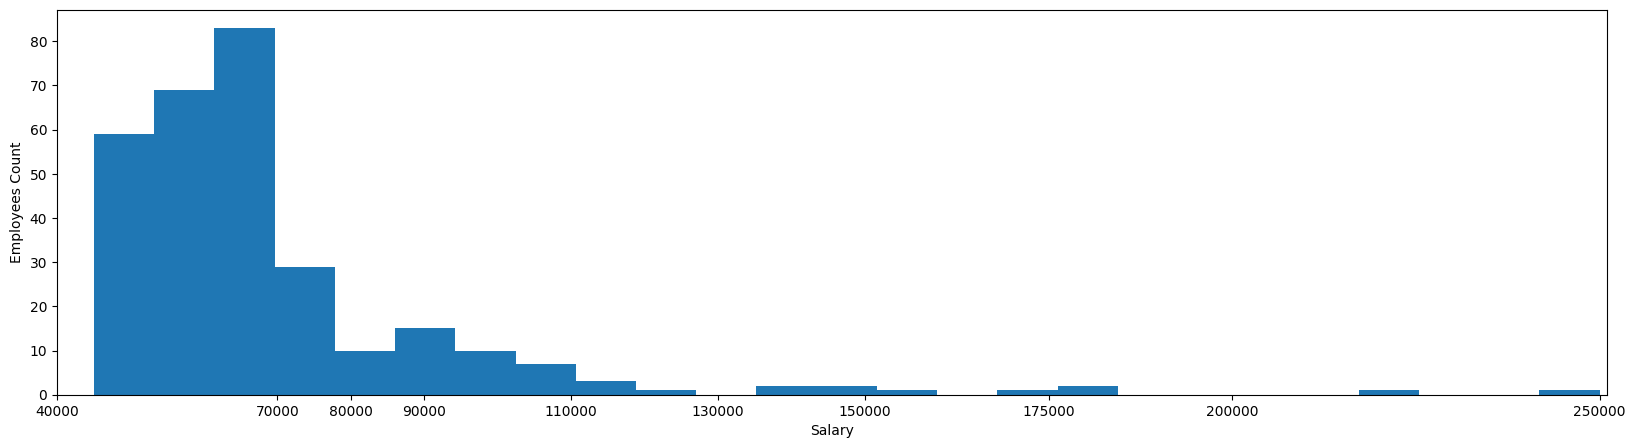

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

plt.xticks([40000, 70000,80000,90000,110000,130000,150000,175000,200000,250000])
plt.xlabel('Salary')
plt.ylabel('Employees Count')
plt.xlim(40000, 251000)
plt.hist(df_salary['Salary'], bins= 25)

<Axes: xlabel='PositionID', ylabel='Salary Grades'>

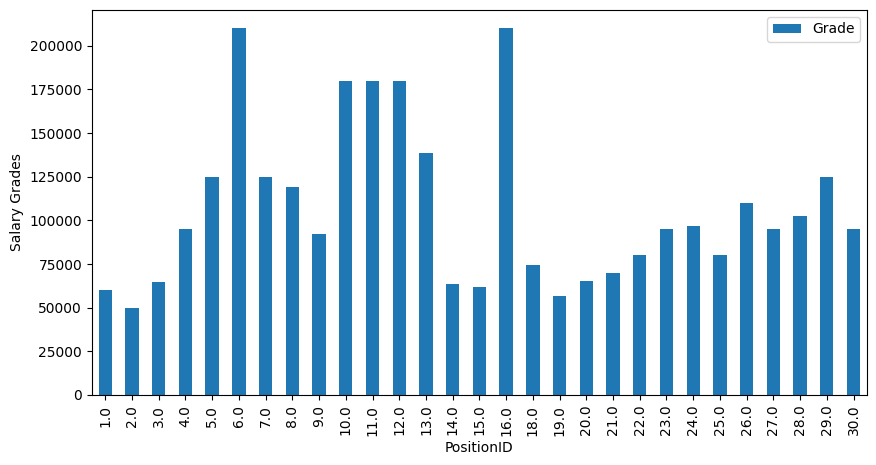

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary Grades')
df_salary.pivot_table(values='Grade', index = 'PositionID').plot.bar(ax=ax)

<Axes: xlabel='age', ylabel='Salary'>

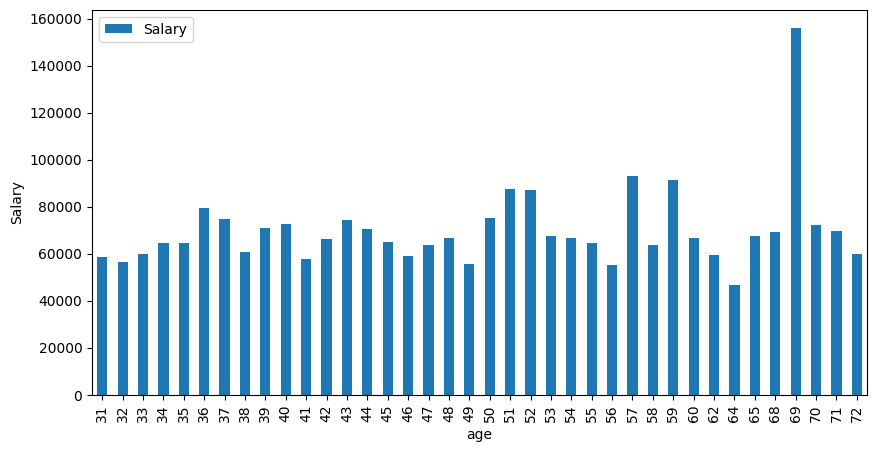

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'age').plot.bar(ax=ax)

<Axes: xlabel='PerfScoreID', ylabel='Salary'>

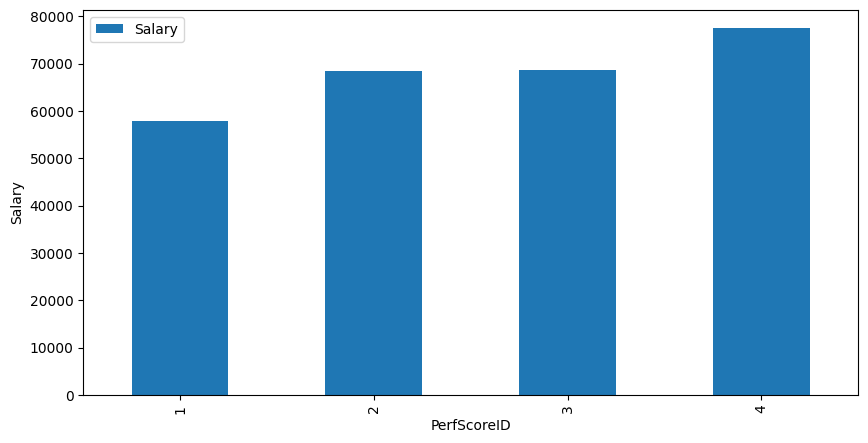

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'PerfScoreID').plot.bar(ax=ax)

<Axes: xlabel='EngagementSurvey', ylabel='Salary'>

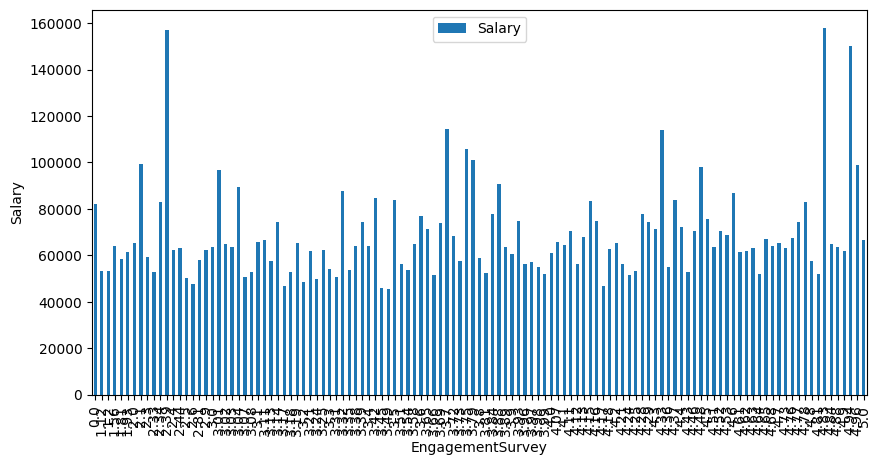

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'EngagementSurvey').plot.bar(ax=ax)

<Axes: xlabel='EmpSatisfaction', ylabel='Salary'>

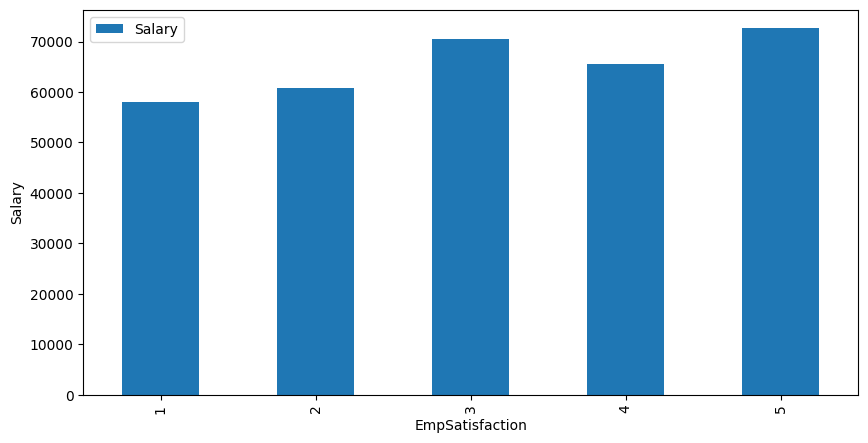

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'EmpSatisfaction').plot.bar(ax=ax)

<Axes: xlabel='SpecialProjectsCount', ylabel='Salary'>

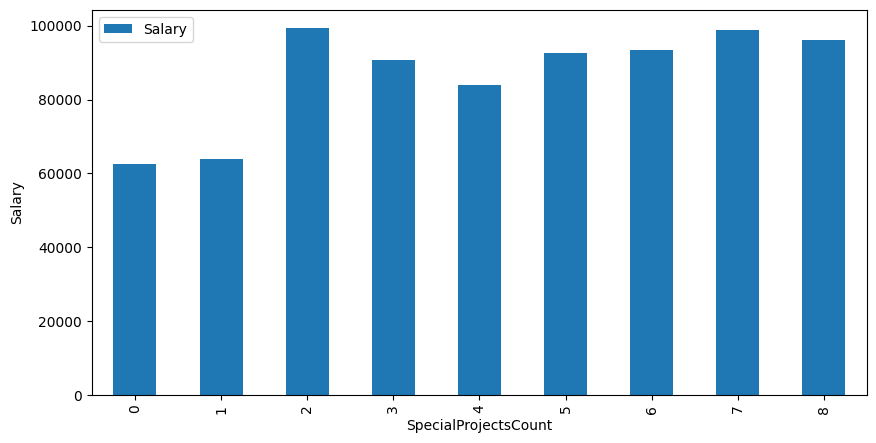

In [ ]:


fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'SpecialProjectsCount').plot.bar(ax=ax)

<Axes: xlabel='emplmnt_intrvl', ylabel='Salary'>

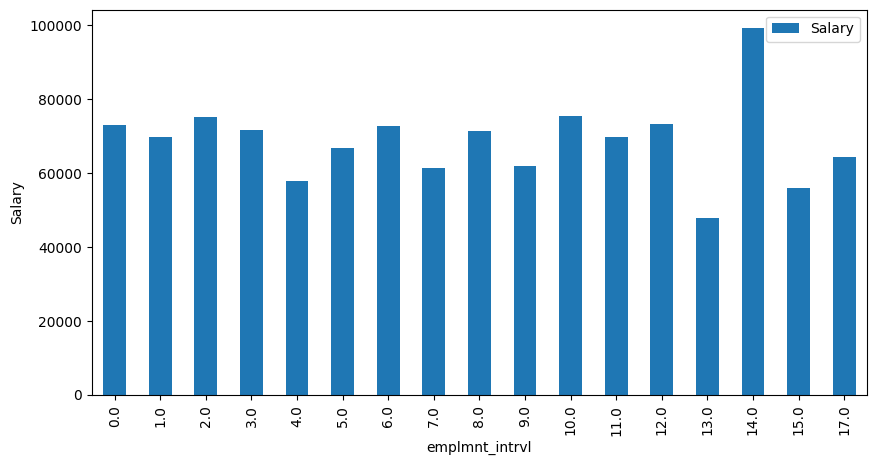

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'emplmnt_intrvl').plot.bar(ax=ax)

<Axes: xlabel='State_labeled', ylabel='Salary'>

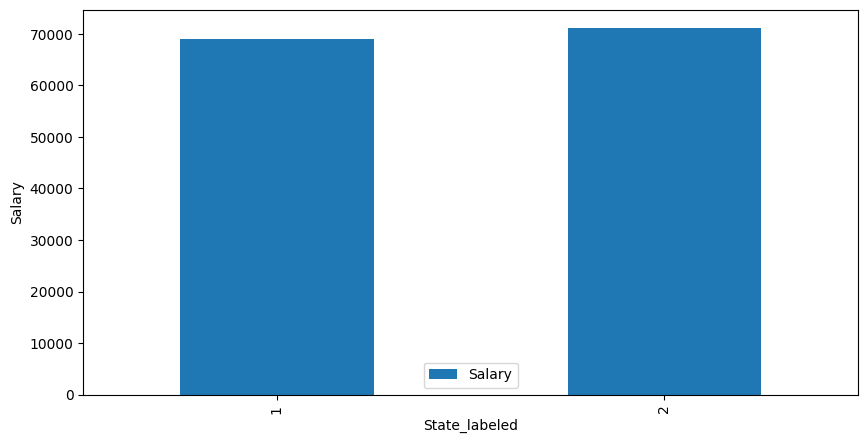

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'State_labeled').plot.bar(ax=ax)

<Axes: xlabel='Sex_labeled', ylabel='Salary'>

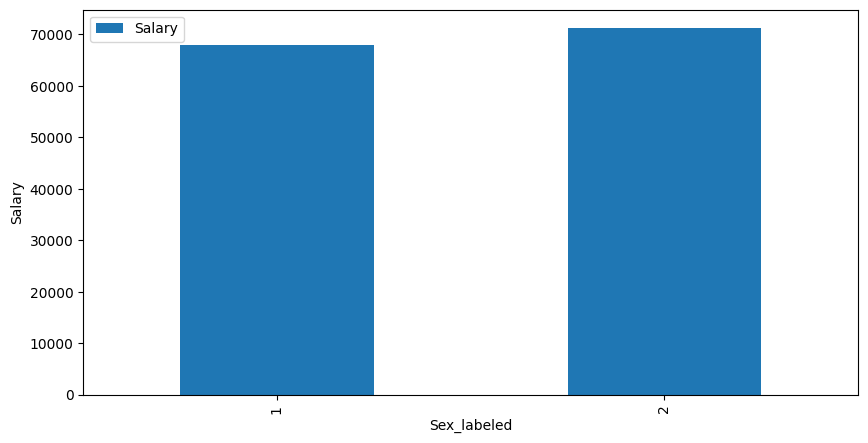

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'Sex_labeled').plot.bar(ax=ax)

<Axes: xlabel='MaritalDesc_labeld', ylabel='Salary'>

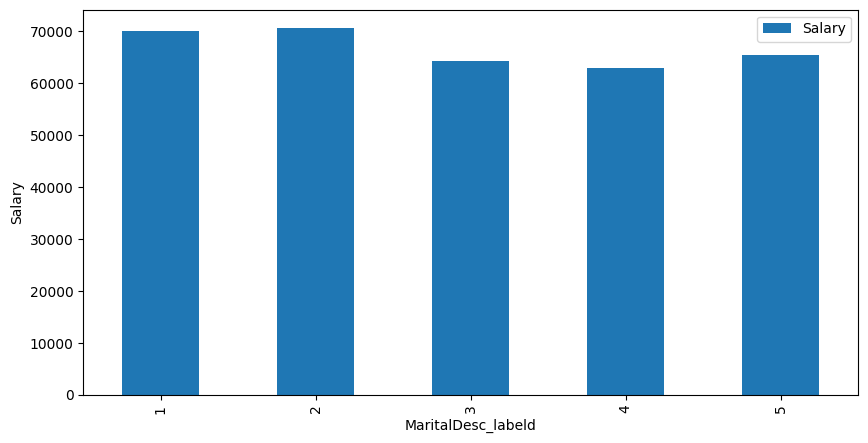

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'MaritalDesc_labeld').plot.bar(ax=ax)

<Axes: xlabel='CitizenDesc_labeled', ylabel='Salary'>

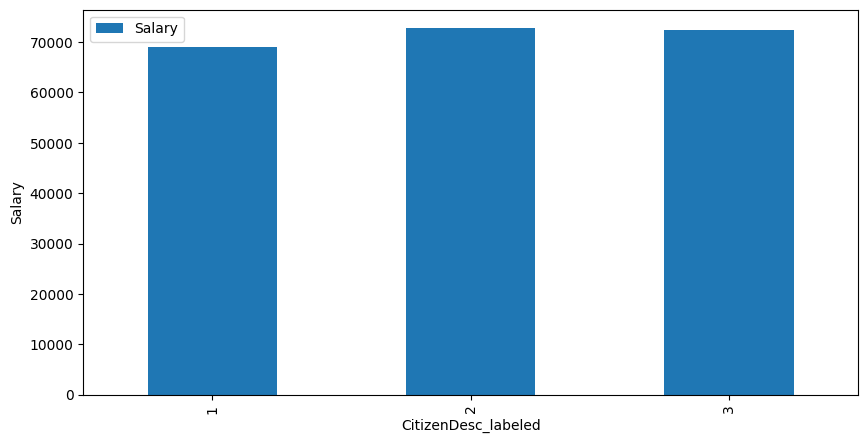

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'CitizenDesc_labeled').plot.bar(ax=ax)

<Axes: xlabel='RaceDesc_labeled', ylabel='Salary'>

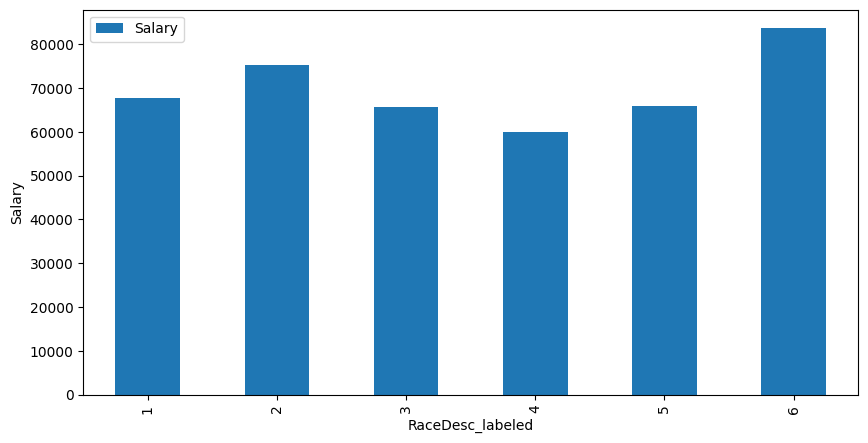

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

plt.ylabel('Salary')
df.pivot_table(values='Salary', index = 'RaceDesc_labeled').plot.bar(ax=ax)

## Studying the relation between salary and employees who quit.

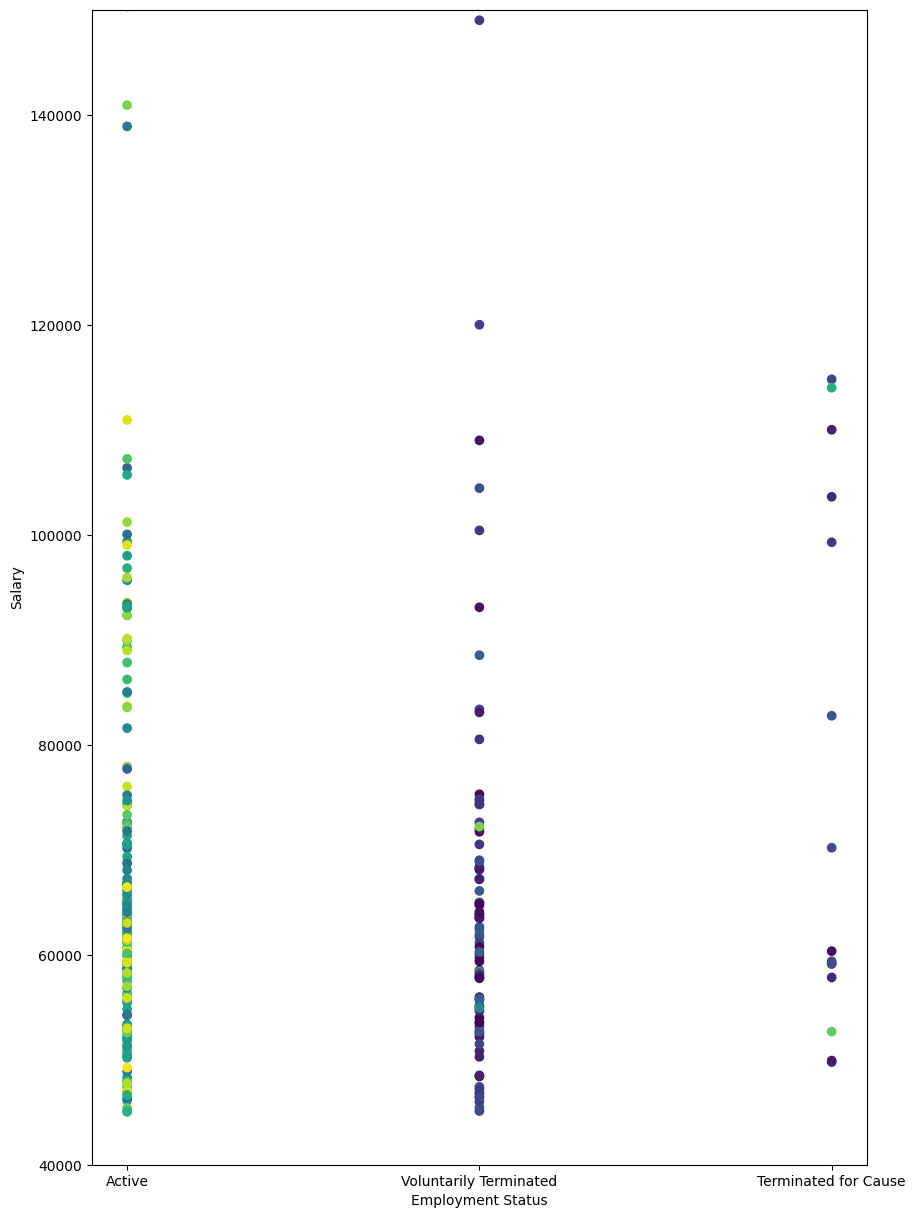

In [ ]:
emp_stat = df_salary['EmploymentStatus']
Sal = df_salary['Salary']
depart = df_salary['Department']

fig, ax = plt.subplots(figsize=(10,15))
plt.ylim (40000, 150000)
plt.xlabel('Employment Status')
plt.ylabel('Salary')
plt.scatter(emp_stat, Sal, c= depart.index)


In [ ]:
df_salary.pivot_table(values='Salary', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'mean')

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
Department,,,
Admin Offices,77315.285714,49920.000000,55000.000000
Executive Office,250000.000000,NaN,NaN
IT/IS,94868.342105,110603.000000,105056.166667
Production,60593.700000,60235.285714,59595.140845
Sales,68932.720000,64778.500000,71677.333333
Software Engineering,91191.666667,99280.000000,97588.666667


<Axes: xlabel='Department'>

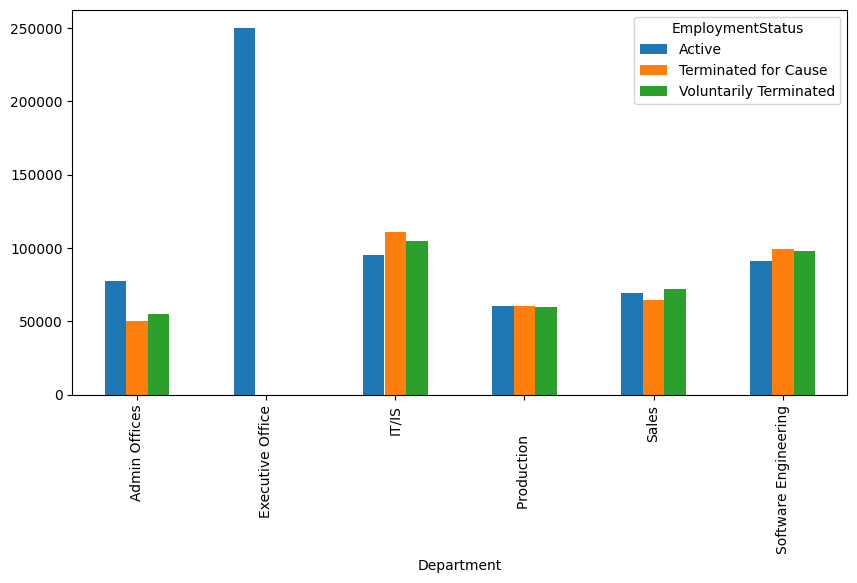

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

df_salary.pivot_table(values='Salary', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'mean').plot.bar(ax=ax)

In [ ]:
df_salary.pivot_table(values='Salary', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'count',
                     margins = True, margins_name='Total')

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated,Total
Department,,,,
Admin Offices,7.0,1.0,1.0,9
Executive Office,1.0,NaN,NaN,1
IT/IS,38.0,4.0,6.0,48
Production,120.0,7.0,71.0,198
Sales,25.0,2.0,3.0,30
Software Engineering,6.0,1.0,3.0,10
Total,197.0,15.0,84.0,296


In [ ]:
df.pivot_table(values='PerformanceScore', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'count',
                     margins = True, margins_name='Total')

EmploymentStatus,1,2,3,Total
Department,,,,
Admin Offices,7.0,1.0,1.0,9
Executive Office,1.0,NaN,NaN,1
IT/IS,38.0,6.0,4.0,48
Production,120.0,71.0,7.0,198
Sales,25.0,3.0,2.0,30
Software Engineering,6.0,3.0,1.0,10
Total,197.0,84.0,15.0,296


<Axes: xlabel='Department'>

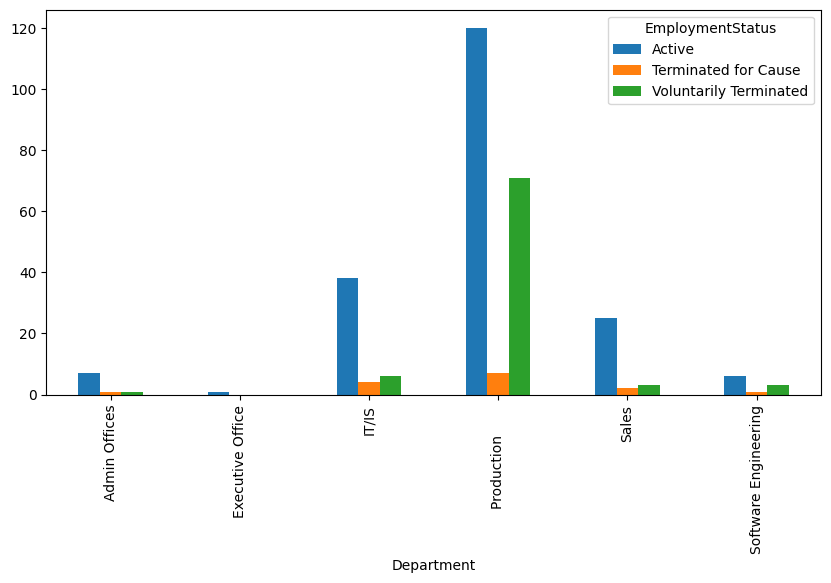

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

df_salary.pivot_table(values='Salary', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'count').plot.bar(ax=ax)

<Axes: xlabel='Department'>

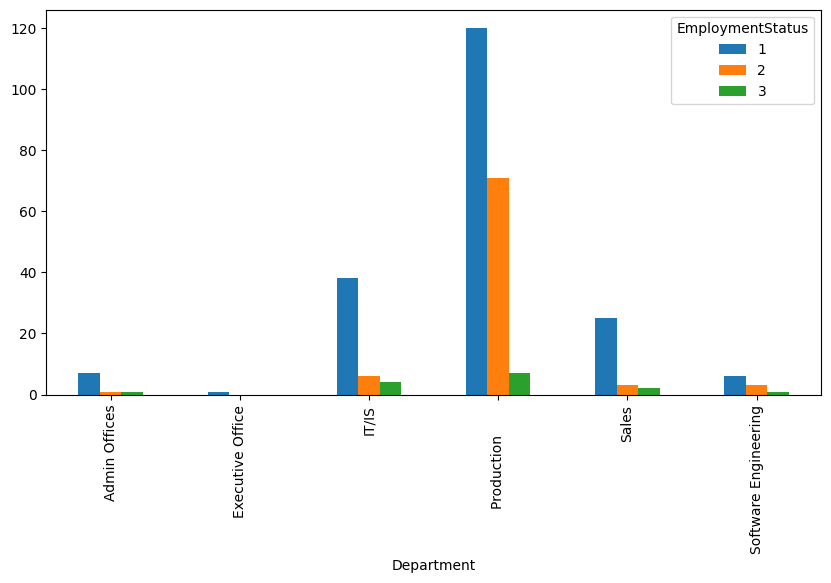

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

df.pivot_table(values='PerformanceScore', index = 'Department',
                     columns= 'EmploymentStatus',
                     aggfunc= 'count').plot.bar(ax=ax)

As the chart and the tables show, majority of voluntary terminations are in Production department and their average salary does not have a big difference comparing to active employees.Although in Admin office is is quite on the contrary. Employees who are paid less, tend to leave the company more. In big picture, the salary does not have a big role in voluntary terminations, but paying attention to the salary distribution in admin office is highly advised.

## Managers Performancees

In [ ]:
man_perf= df.pivot_table(values='EmpID', index = 'ManagerID',
                     columns= 'PerformanceScore',
                     aggfunc= 'count', margins = True, margins_name='Total')
man_perf

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,Total
ManagerID,,,,,
1.0,NaN,7.0,NaN,NaN,7
2.0,4.0,13.0,2.0,NaN,19
4.0,2.0,15.0,NaN,NaN,17
5.0,2.0,4.0,1.0,NaN,7
6.0,1.0,3.0,NaN,NaN,4
7.0,NaN,12.0,NaN,1.0,13
9.0,NaN,2.0,NaN,NaN,2
10.0,2.0,5.0,1.0,NaN,8
11.0,3.0,13.0,1.0,2.0,19


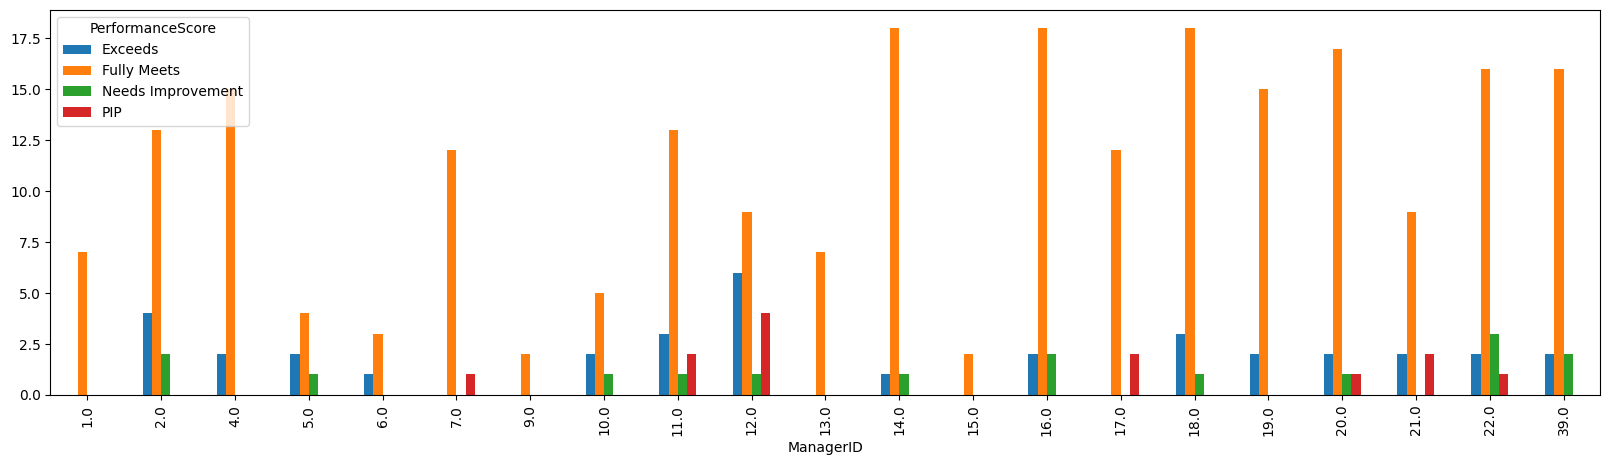

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

c= df.pivot_table(values='EmpID', index = 'ManagerID',
                     columns= 'PerformanceScore',
                     aggfunc= 'count').plot.bar(ax= ax)

In [ ]:
man_perf= man_perf.fillna(0)
man_perf['score']= (man_perf['Exceeds']*2+ man_perf['Fully Meets']*1+ man_perf['Needs Improvement']*.5)/ man_perf['Total']
man_perf.sort_values(by='score')

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,Total,score
ManagerID,,,,,,
17.0,0.0,12.0,0.0,2.0,14,0.857143
7.0,0.0,12.0,0.0,1.0,13,0.923077
22.0,2.0,16.0,3.0,1.0,22,0.977273
1.0,0.0,7.0,0.0,0.0,7,1.000000
21.0,2.0,9.0,0.0,2.0,13,1.000000
15.0,0.0,2.0,0.0,0.0,2,1.000000
13.0,0.0,7.0,0.0,0.0,7,1.000000
9.0,0.0,2.0,0.0,0.0,2,1.000000
20.0,2.0,17.0,1.0,1.0,21,1.023810


## Best Recruitment Source

(array([81., 72., 27., 23.,  0., 29., 48., 13.,  1.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

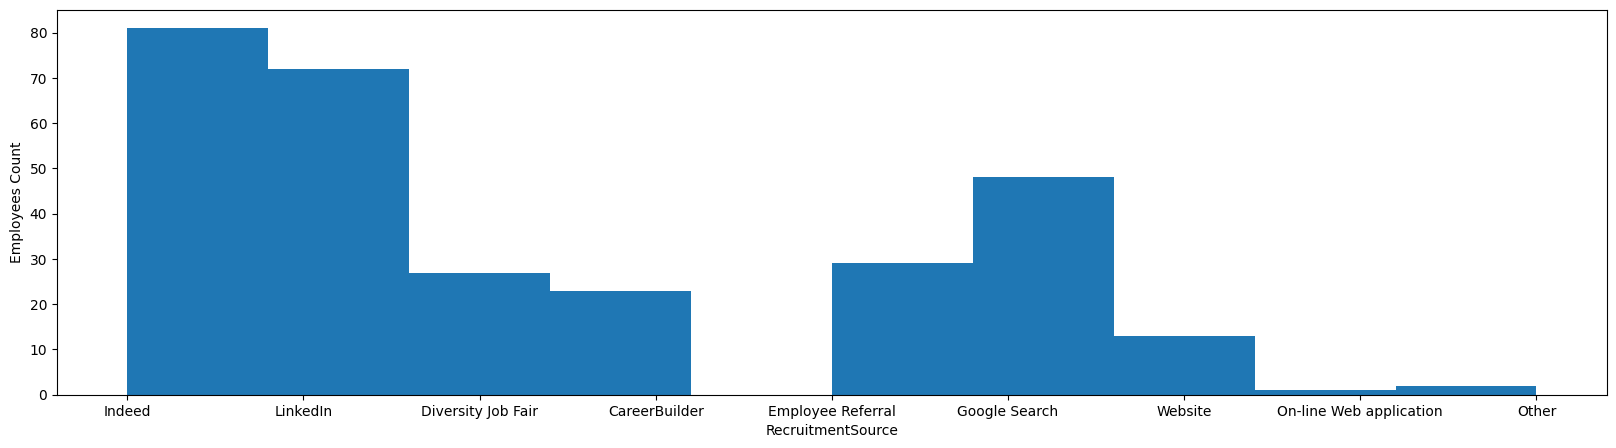

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

plt.xlabel('RecruitmentSource')
plt.ylabel('Employees Count')
# plt.xlim(40000, 251000)
plt.hist(df['RecruitmentSource'])

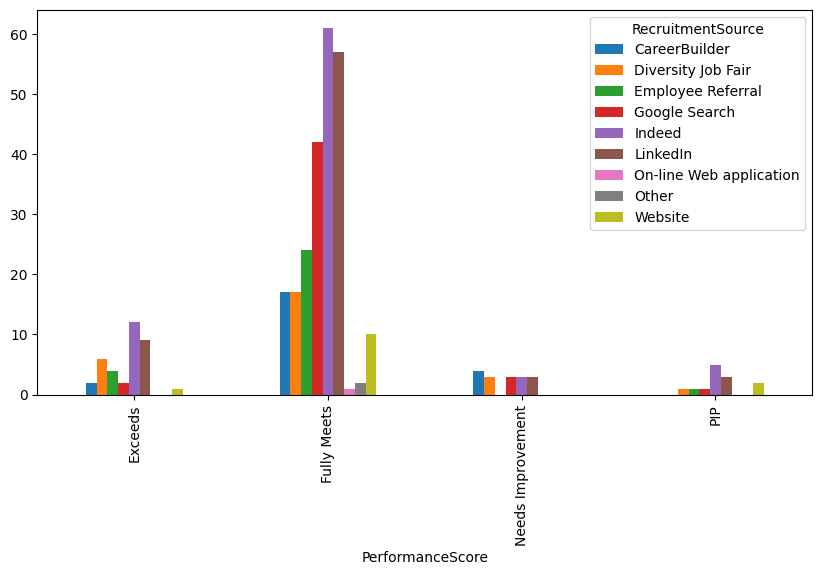

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

c= df.pivot_table(values='EmpID', index = 'PerformanceScore',
                     columns= 'RecruitmentSource',
                     aggfunc= 'count').plot.bar(ax= ax)

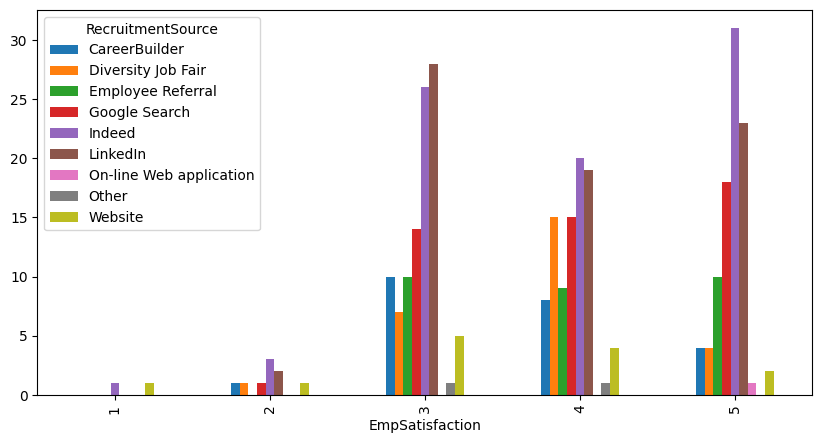

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))       

c= df.pivot_table(values='EmpID', index = 'EmpSatisfaction',
                     columns= 'RecruitmentSource',
                     aggfunc= 'count').plot.bar(ax= ax)

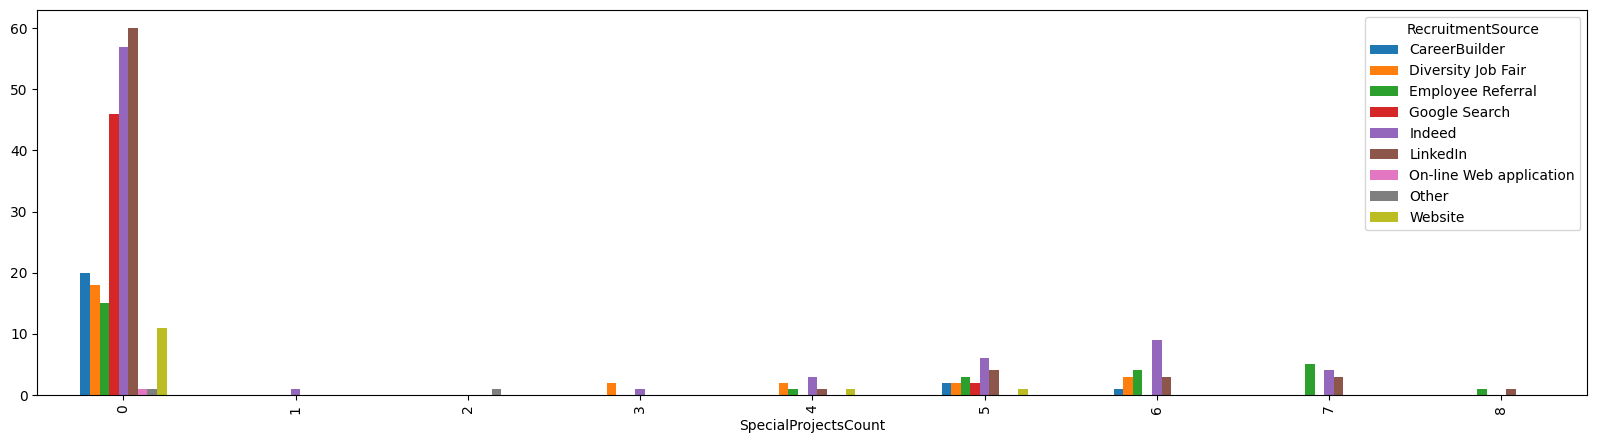

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

c= df.pivot_table(values='EmpID', index = 'SpecialProjectsCount',
                     columns= 'RecruitmentSource',
                     aggfunc= 'count').plot.bar(ax= ax)

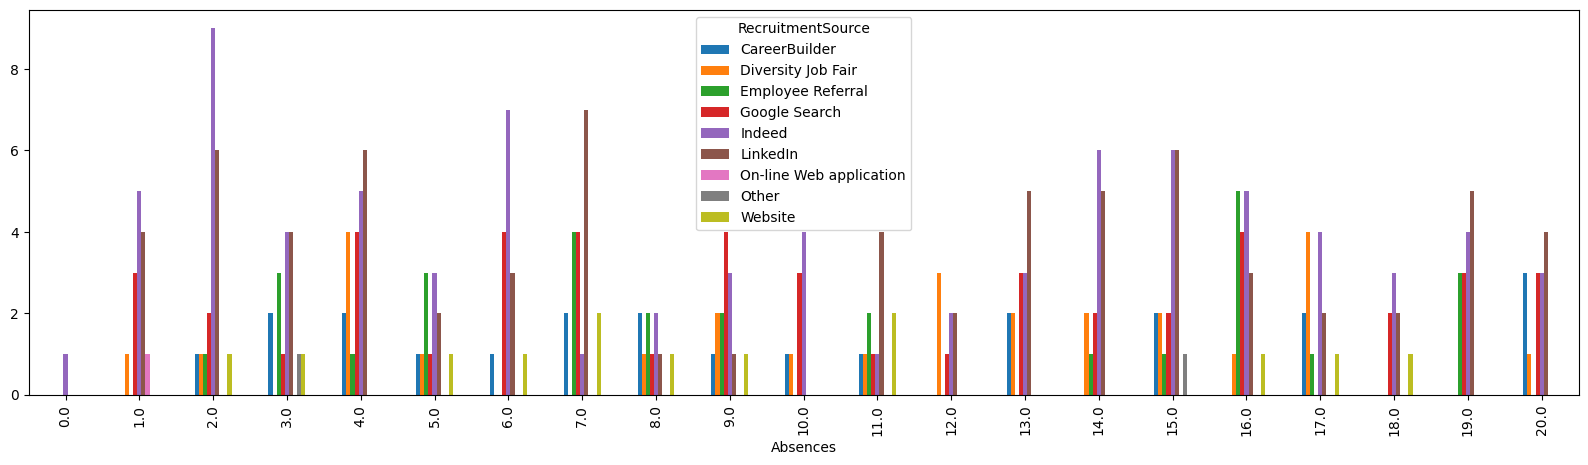

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

c= df.pivot_table(values='EmpID', index = 'Absences',
                     columns= 'RecruitmentSource',
                     aggfunc= 'count').plot.bar(ax= ax)

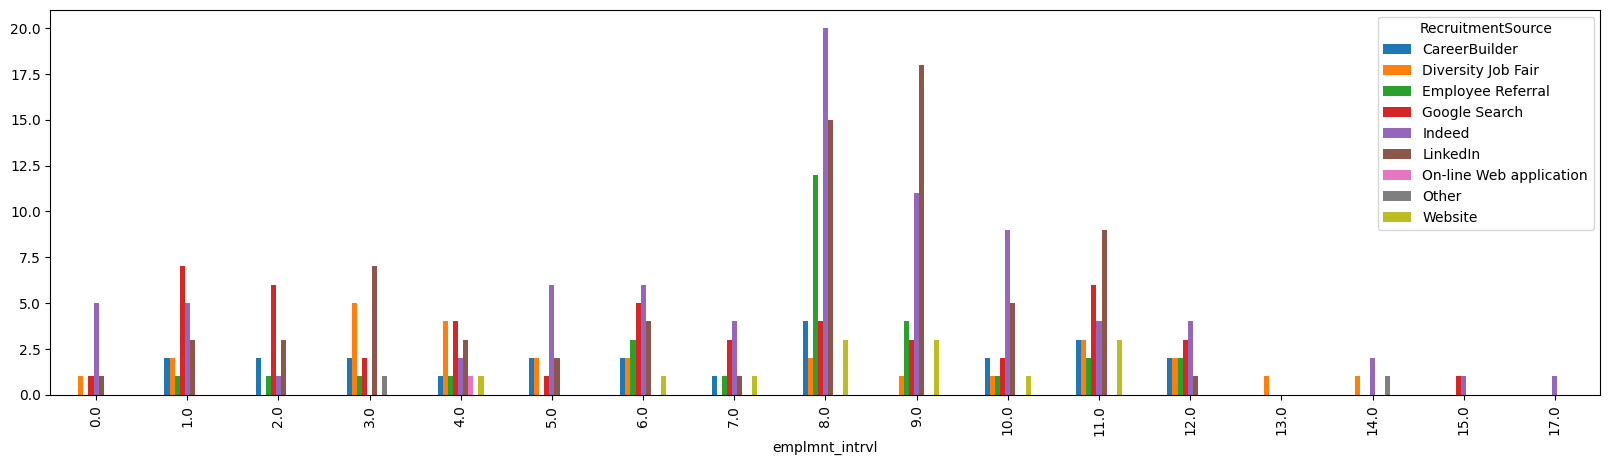

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

c= df.pivot_table(values='EmpID', index = 'emplmnt_intrvl',
                     columns= 'RecruitmentSource',
                     aggfunc= 'count').plot.bar(ax= ax)

It shows some of out predictions about features which can influence the performance were wronge. Hence 'Absence' and 'Latein30Dayes' will not be considered in our estimatin further more.

In [ ]:
df_recref= df[['EmpID', 'emplmnt_intrvl', 'SpecialProjectsCount', 'EmpSatisfaction', 'PerfScoreID', 'RecruitmentSource']]

Normalizing the values:

In [ ]:
df_recref['emplmnt_intrvl']= df_recref['emplmnt_intrvl']/df_recref['emplmnt_intrvl'].max()
df_recref['SpecialProjectsCount']= df_recref['SpecialProjectsCount']/df_recref['SpecialProjectsCount'].max()
df_recref['EmpSatisfaction']= df_recref['EmpSatisfaction']/df_recref['EmpSatisfaction'].max()
df_recref['PerformanceScore']= df_recref['PerfScoreID']/df_recref['PerfScoreID'].max()

Creating a score to examine our hypothesis.

In [ ]:
df_recref['recref_score']= (df_recref['emplmnt_intrvl']+ df_recref['SpecialProjectsCount']*2+ df_recref['EmpSatisfaction']*3+ df_recref['PerformanceScore']*4)/10

In [ ]:
recref= df_recref.pivot_table(values='recref_score', index = 'RecruitmentSource',
                     aggfunc= 'mean')
recref.sort_values(by= 'recref_score', ascending= False)

,recref_score
RecruitmentSource,
Employee Referral,0.673164
On-line Web application,0.623529
Indeed,0.617139
Diversity Job Fair,0.609390
LinkedIn,0.600127
Other,0.585000
Google Search,0.577365
CareerBuilder,0.567212
Website,0.547534


<Axes: xlabel='RecruitmentSource'>

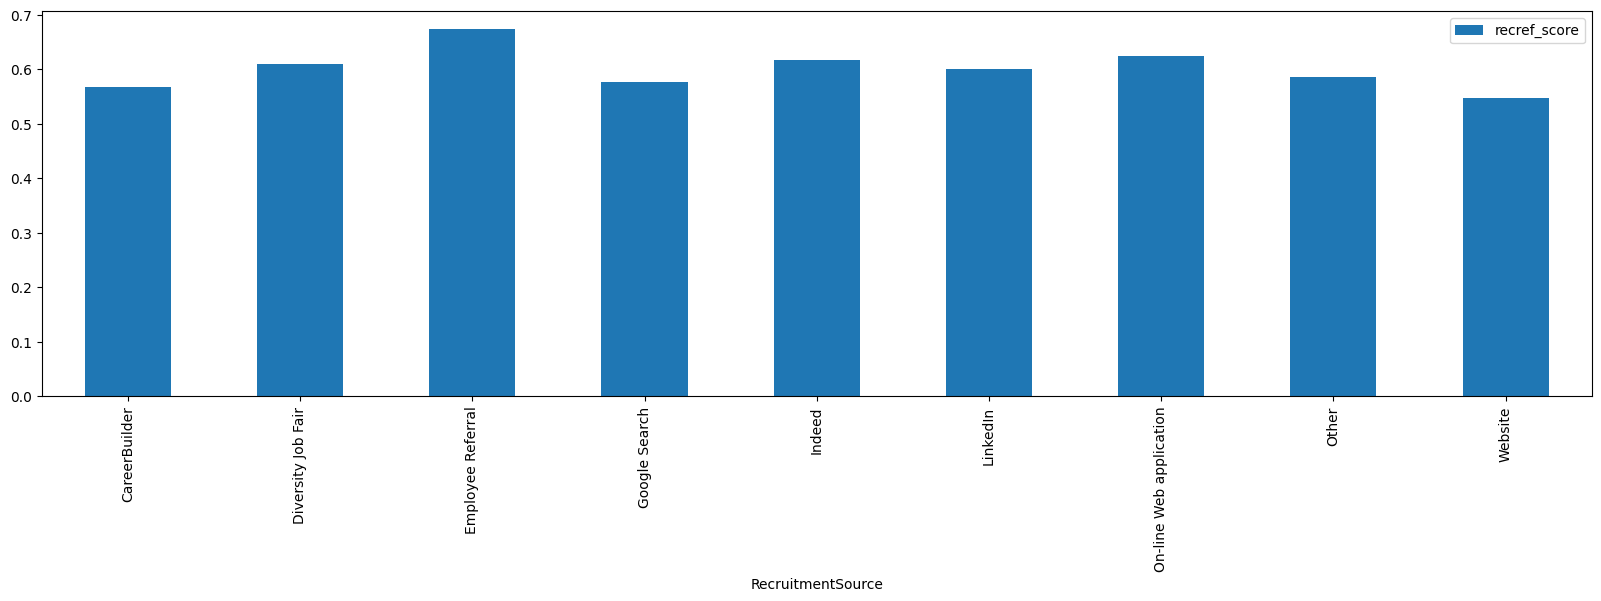

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))       

recref.plot.bar(ax= ax)

## Model

Feature Selection

In [ ]:
cor['PerfScoreID']

PerfScoreID                  1.000000
EngagementSurvey             0.508628
EmpSatisfaction              0.303369
SpecialProjectsCount         0.044414
DaysLateLast30              -0.733611
Absences                     0.064007
PositionID                   0.027004
age                          0.072990
emplmnt_intrvl               0.102054
Salary_Grade                 0.135645
RecruitmentSource_Labeled   -0.019799
State_labeled               -0.022793
Sex_labeled                 -0.062813
MaritalDesc_labeld           0.035562
CitizenDesc_labeled         -0.011301
RaceDesc_labeled            -0.033801
Department_Labeled                NaN
Name: PerfScoreID, dtype: float64

In [ ]:
df.columns

Index(['EmpID', 'PerfScoreID', 'Salary', 'State', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'RaceDesc', 'EmploymentStatus', 'Department',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'ManagerID', 'PositionID', 'age',
       'emplmnt_intrvl', 'Salary_Grade', 'RecruitmentSource_Labeled',
       'State_labeled', 'Sex_labeled', 'MaritalDesc_labeld',
       'CitizenDesc_labeled', 'RaceDesc_labeled', 'Department_Labeled'],
      dtype='object')

Preparing data, some columns are not needed in our test and train data, such as text columns which has relatively labeled data in another column.

In [378]:
drop= ['EmpID', 'Salary', 'State', 'Sex', 'MaritalDesc','CitizenDesc', 'RaceDesc','RecruitmentSource', 'PerformanceScore', 'PerfScoreID','LastPerformanceReview_Date', 'Department']
X= df.drop(drop, axis = 1)
y= df['PerfScoreID']

In [379]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state =3)


We will find best features based on the RandomForestClassifier

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.inspection import permutation_importance
from numpy import mean
from numpy import std

for count in range(1,19):
  # create pipeline
  rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=count)
  model = RandomForestClassifier()
  pipeline = Pipeline(steps=[('s',rfe),('m',model)])
  # evaluate model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print(f'Accuracy for {count} Feature: {(mean(n_scores), std(n_scores))}')

  


Accuracy for 1 Feature: (0.7570114942528735, 0.060684575428884134)
Accuracy for 2 Feature: (0.7310344827586207, 0.06268391270044496)
Accuracy for 3 Feature: (0.7760919540229885, 0.05889904613056565)
Accuracy for 4 Feature: (0.8100766283524905, 0.05433486509527049)
Accuracy for 5 Feature: (0.8076628352490421, 0.04850913657178957)
Accuracy for 6 Feature: (0.8168582375478927, 0.045020053793955336)
Accuracy for 7 Feature: (0.8257854406130269, 0.043130957590223944)
Accuracy for 8 Feature: (0.8391187739463601, 0.03701968369611428)
Accuracy for 9 Feature: (0.837049808429119, 0.045925913495481425)
Accuracy for 10 Feature: (0.84360153256705, 0.030204501577778337)
Accuracy for 11 Feature: (0.8447892720306514, 0.029952007726383803)
Accuracy for 12 Feature: (0.8459386973180077, 0.03255192346483839)
Accuracy for 13 Feature: (0.835785440613027, 0.03801770353099555)
Accuracy for 14 Feature: (0.8481992337164752, 0.03265249103063078)
Accuracy for 15 Feature: (0.8437547892720308, 0.03307727431263167)
Ac

In [ ]:
rfe_method = RFE(RandomForestClassifier(), n_features_to_select=8, step=2)

rfe_method.fit(X_train, y_train)
X_train.columns[(rfe_method.get_support())] 

Index(['EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'Absences',
       'ManagerID', 'age', 'emplmnt_intrvl', 'Salary_Grade'],
      dtype='object')

Setting up our dataset with columns chosen by RFE:

In [380]:
X= df[['EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'Absences',
       'ManagerID', 'age', 'emplmnt_intrvl', 'Salary_Grade']]
y= df['PerfScoreID']

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state =3)

Using lazypredict library to find best suited model.

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 16.73it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.88               0.77    None      0.83   
RandomForestClassifier             0.87               0.71    None      0.82   
LabelPropagation                   0.74               0.66    None      0.76   
LabelSpreading                     0.74               0.66    None      0.76   
BaggingClassifier                  0.81               0.65    None      0.79   
LogisticRegression                 0.85               0.65    None      0.80   
SVC                                0.85               0.65    None      0.81   
AdaBoostClassifier                 0.79               0.64    None      0.77   
Perceptron                         0.82               0.63    None      0.78   
GaussianNB                         0.21               0.63    None      0.12   
LinearSVC                          0.84 

Trying to tune hyperparameters for "LinearDiscriminantAnalysis", "Perceptron", "ExtraTreesClassifier", "RandomForestClassifier" and "LogisticRegression"

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
test_model = LinearDiscriminantAnalysis()

# Hyperparameter Optimization
grid_params = {'solver': ['svd', 'lsqr', 'eigen'], 'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Run the grid search
clf = GridSearchCV(test_model, grid_params, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
        
print (f'Best Model - LinearDiscriminantAnalysis : {best_clf.best_estimator_}')
        
print (f'Accuracy - LinearDiscriminantAnalysis : {best_clf.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Model - LinearDiscriminantAnalysis : LinearDiscriminantAnalysis()
Accuracy - LinearDiscriminantAnalysis : 0.831


In [ ]:
l_dis= LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred= l_dis.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)

print (f'F1 Score - LinearDiscriminantAnalysis : {f1.mean()}')
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

F1 Score - LinearDiscriminantAnalysis : 0.5200051626226123

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.50      0.50      0.50         4
           3       0.86      1.00      0.93        69
           4       1.00      0.08      0.15        12

    accuracy                           0.83        89
   macro avg       0.72      0.52      0.52        89
weighted avg       0.85      0.83      0.78        89


[[ 2  2  0  0]
 [ 2  2  0  0]
 [ 0  0 69  0]
 [ 0  0 11  1]]


In [ ]:
from sklearn.svm import LinearSVC
test_model = LinearSVC()

# Hyperparameter Optimization
grid_params = {'penalty': ['l1', 'l2'], 'tol': [0.0001, 0.001, 0.01, 0.1, 1.0],
               'loss': ['hinge', 'squared_hinge'],
               'multi_class':['ovr', 'crammer_singer'],
               'max_iter': [100, 1000, 10000]}

# Run the grid search
clf = GridSearchCV(test_model, grid_params, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
        
print (f'Best Model - LinearSVC : {best_clf.best_estimator_}')
        
print (f'Accuracy - LinearSVC : {best_clf.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Model - LinearSVC : LinearSVC(loss='hinge', max_iter=100, tol=0.001)
Accuracy - LinearSVC : 0.337


In [ ]:
l_svc= LinearSVC(loss='hinge', max_iter=100, tol=0.001).fit(X_train, y_train)
y_pred= l_svc.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)

print (f'F1 Score - LinearSVC : {f1.mean()}')
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

F1 Score - LinearSVC : 0.21835443037974686

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.78      1.00      0.87        69
           4       0.00      0.00      0.00        12

    accuracy                           0.78        89
   macro avg       0.19      0.25      0.22        89
weighted avg       0.60      0.78      0.68        89


[[ 0  0  4  0]
 [ 0  0  4  0]
 [ 0  0 69  0]
 [ 0  0 12  0]]


In [ ]:
from sklearn.linear_model import Perceptron
test_model = Perceptron()

# Hyperparameter Optimization
grid_params = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0], 
                    'max_iter': [1, 10, 100, 1000, 10000]}

# Run the grid search
clf = GridSearchCV(test_model, grid_params, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
        
print (f'Best Model - Perceptron : {best_clf.best_estimator_}')
        
print (f'Accuracy - Perceptron : {best_clf.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Model - Perceptron : Perceptron(eta0=0.0001, max_iter=10)
Accuracy - Perceptron : 0.135


In [ ]:
perc= Perceptron(eta0=0.0001, max_iter=10).fit(X_train, y_train)
y_pred= perc.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)

print (f'F1 Score - Perceptron : {f1.mean()}')
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

F1 Score - Perceptron : 0.05940594059405941

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        69
           4       0.13      1.00      0.24        12

    accuracy                           0.13        89
   macro avg       0.03      0.25      0.06        89
weighted avg       0.02      0.13      0.03        89


[[ 0  0  0  4]
 [ 0  0  0  4]
 [ 0  0  0 69]
 [ 0  0  0 12]]


In [382]:
from sklearn.ensemble import ExtraTreesClassifier

test_model = ExtraTreesClassifier(verbose= True)
# Hyperparameter Optimization
grid_params = {'n_estimators': [100, 500, 1000, 5000], 
                    'criterion': ['entropy', 'gini', 'log_loss'],
                    'max_features': ['auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None]
                    }

# Run the grid search
clf = GridSearchCV(test_model, grid_params, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
        
print (f'Best Model - ExtraTreesClassifier : {best_clf.best_estimator_}')
        
print (f'Accuracy - ExtraTreesClassifier : {best_clf.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model - ExtraTreesClassifier : ExtraTreesClassifier(max_features='auto', n_estimators=5000, verbose=True)
Accuracy - ExtraTreesClassifier : 0.854


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.8s finished


In [383]:
xtra_tree= ExtraTreesClassifier(max_features='log2', verbose=True).fit(X_train, y_train)
y_pred= xtra_tree.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)

print (f'F1 Score - ExtraTreesClassifier : {f1.mean()}')
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


F1 Score - ExtraTreesClassifier : 0.7065130991305488

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       0.87      0.99      0.93        70
           4       0.50      0.09      0.15        11

    accuracy                           0.87        89
   macro avg       0.79      0.71      0.71        89
weighted avg       0.83      0.87      0.83        89


[[ 4  0  0  0]
 [ 1  3  0  0]
 [ 0  0 69  1]
 [ 0  0 10  1]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [386]:

dtc = RandomForestClassifier(verbose= True)
# Hyperparameter Optimization
grid_params = {'n_estimators': [100, 500, 1000, 5000], 
                    'criterion': ['entropy', 'gini', 'log_loss'],
                    'max_features': ['auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None]
                    }

# Run the grid search
clf = GridSearchCV(dtc, grid_params, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
        
print (f'Best Model - RandomForestClassifier : {best_clf.best_estimator_}')
        
print (f'Accuracy - RandomForestClassifier : {best_clf.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model - RandomForestClassifier : RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=1000, verbose=True)
Accuracy - RandomForestClassifier : 0.865


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [389]:
ran_for= RandomForestClassifier(n_estimators=500, verbose=True).fit(X_train, y_train)
y_pred= ran_for.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)

print (f'F1 Score - RandomForestClassifier : {f1.mean()}')
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


F1 Score - RandomForestClassifier : 0.6450051626226123

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.75      0.75      0.75         4
           3       0.87      0.99      0.93        70
           4       0.50      0.09      0.15        11

    accuracy                           0.85        89
   macro avg       0.72      0.64      0.65        89
weighted avg       0.82      0.85      0.81        89


[[ 3  1  0  0]
 [ 1  3  0  0]
 [ 0  0 69  1]
 [ 0  0 10  1]]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [390]:
from sklearn.metrics import precision_recall_fscore_support

rand_for= ExtraTreesClassifier(max_features='log2', verbose=True).fit(X_train, y_train)
y_pred= rand_for.predict(X_test)
f1= f1_score(y_test, y_pred, average=None)


print(confusion_matrix(y_test, y_pred, labels= [1,2, 3, 4]))
print()
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

[[ 4  0  0  0]
 [ 1  3  0  0]
 [ 0  0 69  1]
 [ 0  0 10  1]]

(0.8296543877115632, 0.8651685393258427, 0.8259398813655657, None)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
